<a href="https://colab.research.google.com/github/Dynamixmoses/Dynamixmoses/blob/main/Moses_Okesola1_Hotels_Management_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

**Data Overview**


**Import Dataset**

In [ ]:
df= pd.read_csv('/Users/Moses Okesola/Downloads/INNHotelsGroup (1).csv')

**The first 5 rows of the data**

In [ ]:
# The first 5 rows of the data
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

**The last 5 rows of the data**

In [ ]:
# The last 5 rows of the data
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

**Understand the shape of the dataset**

In [ ]:
# view dimensions of the data
df.shape

(36275, 19)

There are 36275 rows and 19 columns.

**Check the data types of the columns for the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

There are fourteen numeric( one float and thirteen integer type) and five string( object type) columns in the dataset.

**Let's drop the Booking_ID column:It is a unique identifier**

In [ ]:
# drop the Booking_ID column from the dataframe
df= df.drop(columns=["Booking_ID"])

In [ ]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

The Booking_ID column has been dropped.

**Let's check the statistical summary of the data**

In [ ]:
df.describe(include="all").T

count unique           top   freq  \
no_of_adults                         36275.00000    NaN           NaN    NaN   
no_of_children                       36275.00000    NaN           NaN    NaN   
no_of_weekend_nights                 36275.00000    NaN           NaN    NaN   
no_of_week_nights                    36275.00000    NaN           NaN    NaN   
type_of_meal_plan                          36275      4   Meal Plan 1  27835   
required_car_parking_space           36275.00000    NaN           NaN    NaN   
room_type_reserved                         36275      7   Room_Type 1  28130   
lead_time                            36275.00000    NaN           NaN    NaN   
arrival_year                         36275.00000    NaN           NaN    NaN   
arrival_month                        36275.00000    NaN           NaN    NaN   
arrival_date                         36275.00000    NaN           NaN    NaN   
market_segment_type                        36275      5        Online  23214   
repeated_guest                       36275.00000    NaN           NaN    NaN   
no_of_previous_cancellations         36275.00000    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled 36275.00000    NaN           NaN    NaN   
avg_price_per_room                   36275.00000    NaN           NaN    NaN   
no_of_special_requests               36275.00000    NaN           NaN    NaN   
booking_status                             36275      2  Not_Canceled  24390   

                                           mean      std        min  \
no_of_adults                            1.84496  0.51871    0.00000   
no_of_children                          0.10528  0.40265    0.00000   
no_of_weekend_nights                    0.81072  0.87064    0.00000   
no_of_week_nights                       2.20430  1.41090    0.00000   
type_of_meal_plan                           NaN      NaN        NaN   
required_car_parking_space              0.03099  0.17328    0.00000   
room_type_reserved                          NaN      NaN        NaN   
lead_time                              85.23256 85.93082    0.00000   
arrival_year                         2017.82043  0.38384 2017.00000   
arrival_month                           7.42365  3.06989    1.00000   
arrival_date                           15.59700  8.74045    1.00000   
market_segment_type                         NaN      NaN        NaN   
repeated_guest                          0.02564  0.15805    0.00000   
no_of_previous_cancellations            0.02335  0.36833    0.00000   
no_of_previous_bookings_not_canceled    0.15341  1.75417    0.00000   
avg_price_per_room                    103.42354 35.08942    0.00000   
no_of_special_requests                  0.61966  0.78624    0.00000   
booking_status                              NaN      NaN        NaN   

                                            25%        50%        75%  \
no_of_adults                            2.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    1.00000    2.00000   
no_of_week_nights                       1.00000    2.00000    3.00000   
type_of_meal_plan                           NaN        NaN        NaN   
required_car_parking_space              0.00000    0.00000    0.00000   
room_type_reserved                          NaN        NaN        NaN   
lead_time                              17.00000   57.00000  126.00000   
arrival_year                         2018.00000 2018.00000 2018.00000   
arrival_month                           5.00000    8.00000   10.00000   
arrival_date                            8.00000   16.00000   23.00000   
market_segment_type                         NaN        NaN        NaN   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_

-The average number of previous bookings that were canceled by the customer prior to the current booking is ~0.
-The minimum number of previous bookings that were canceled by the customer prior to the current booking is ~0.
-The maximum number of previous bookings that were canceled by the customer prior to the current booking is 13.
-The average number of previous bookings that were not canceled by the customer prior to the current booking is ~0.
-The minimum number of previous bookings that were not canceled by the customer prior to the current booking is ~0.
-The maximum number of previous bookings that were not canceled by the customer prior to the current booking is 58.
-The ratio of no_of_previous_cancellations to no_of_previous_bookings_not_canceled	at minimum is 0 to 0, and at maximum is 13 to 58 or ~1 to 4.
-The mean of the Average price per day of the reservation is ~103 Euro with 0 and 540 Euro as its minimum and maximum value respectively.


**Checking for duplicate values**

In [ ]:
df.duplicated().sum()

10275

**Checking for missing values**

In [ ]:
df.isnull().sum().any()

False

In [ ]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no missing values in the dataset

**Extract numerical variables**

In [ ]:
numerical_vars = df.select_dtypes(include=['number'])
# 'number' includes int and float types
print("Numerical Variables:")
print(numerical_vars.columns)

Numerical Variables:
Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')


There are 14 numerical variable-columns.

****Extract categorical variables****

In [ ]:
categorical_vars = df.select_dtypes(include=['object'])
# 'object' data type usually represents categorical variables
print("\nCategorical Variables:")
print(categorical_vars.columns)


Categorical Variables:
Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')


There are 4 categorical variable-columns.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

**Function to create histogram-boxplot visualization**

In [ ]:
# function to create histogram-boxplot visualization

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Function to create labelled barplots**

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Univariate Analysis**

**Data visualization of numerical variables by histogram_boxplot**

**Observation on Previous Cancelation**

In [ ]:
df.no_of_previous_cancellations.unique()

array([ 0,  3,  1,  2, 11,  4,  5, 13,  6], dtype=int64)

The array reveals the range and diversity of the number of previous cancellations among guests staying at the hotel.

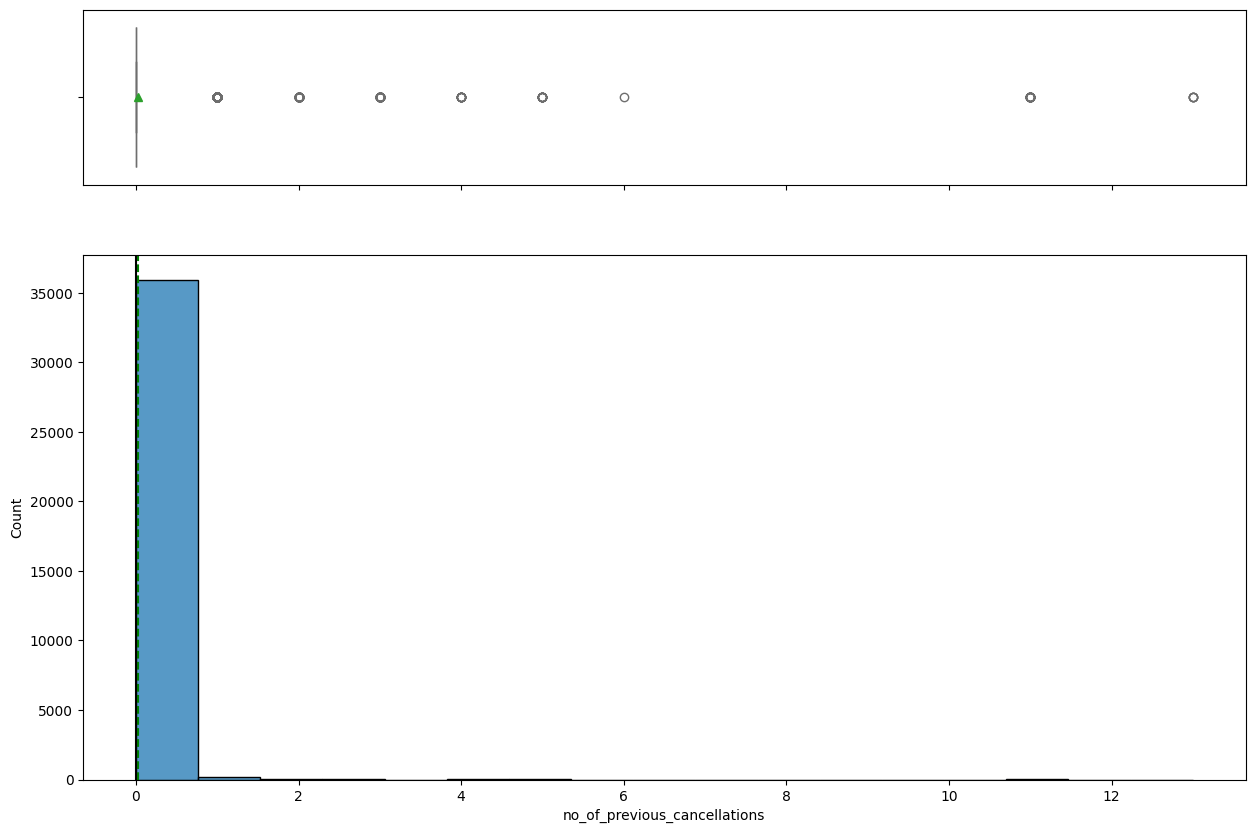

In [ ]:
histogram_boxplot(df, "no_of_previous_cancellations")

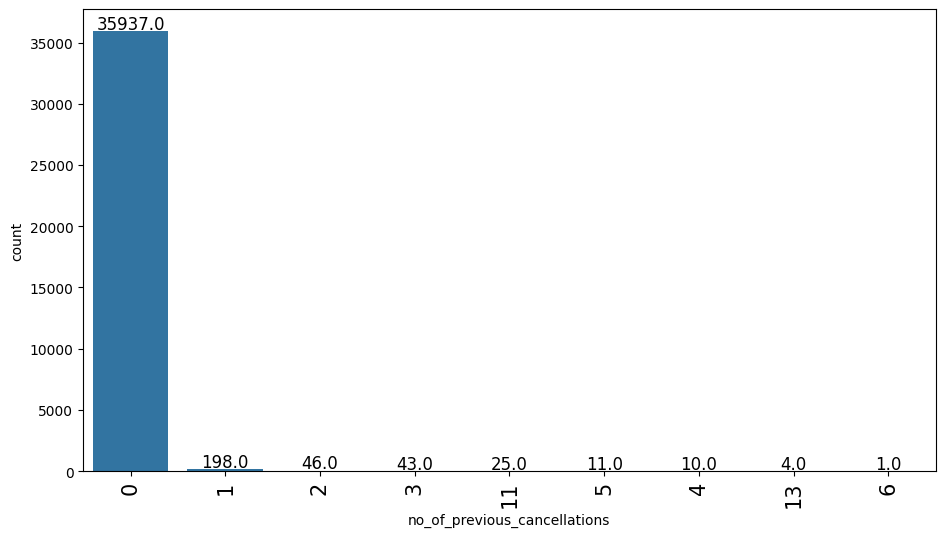

In [ ]:
# create a labeled barplot for Number of previous cancellations
labeled_barplot(df,"no_of_previous_cancellations")

.The distribution of the number of previous cancellations appears to be right-skewed.

.The total number of bookings not cancelled exceeds cancelled bookings.

.The majority of guests seem to have lower numbers of previous cancellation..

**Observation on Previous Booking not Canceled**

In [ ]:
df.no_of_previous_bookings_not_canceled.unique()

array([ 0,  5,  1,  3,  4, 12, 19,  2, 15, 17,  7, 20, 16, 50, 13,  6, 14,
       34, 18,  8, 10, 23, 11, 49, 47, 53,  9, 33, 22, 24, 52, 21, 48, 28,
       39, 25, 31, 38, 26, 51, 42, 37, 35, 56, 44, 27, 32, 55, 45, 30, 57,
       46, 54, 43, 58, 41, 29, 40, 36], dtype=int64)

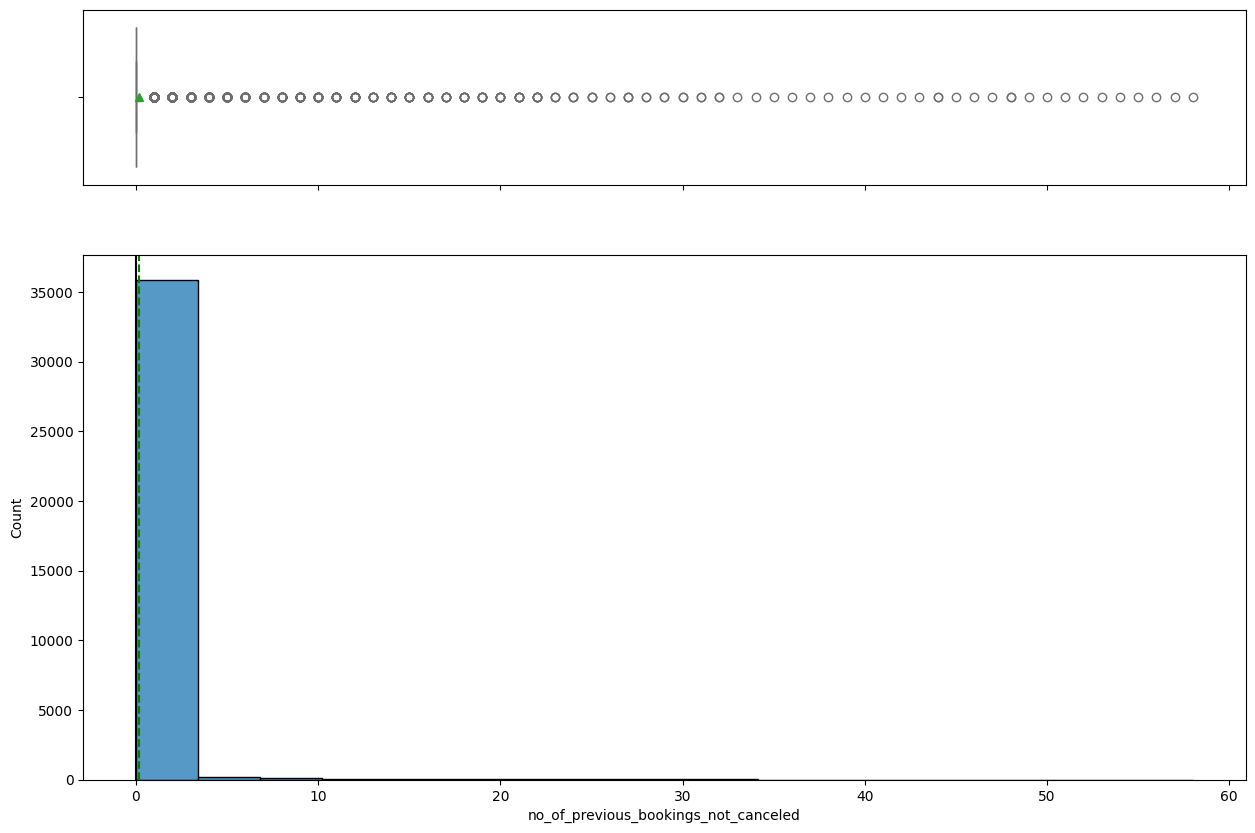

In [ ]:
histogram_boxplot(df, "no_of_previous_bookings_not_canceled")

.The distribution is right skewed.

.The presence of '0' indicates guests who did not have any previous bookings' cancellations.

.Some guests have a history of numerous successful bookings without cancellations, while others may have had fewer instances of such bookings.

**Observations on Lead Time**

In [ ]:
df.lead_time.unique()

array([224,   5,   1, 211,  48, 346,  34,  83, 121,  44,   0,  35,  30,
        95,  47, 256,  99,  12, 122,   2,  37, 130,  60,  56,   3, 107,
        72,  23, 289, 247, 186,  64,  96,  41,  55, 146,  32,  57,   7,
       124, 169,   6,  51,  13, 100, 139, 117,  39,  86,  19, 192, 179,
        26,  74, 143, 177,  18, 267, 155,  46, 128,  20,  40, 196, 188,
        17, 110,  68,  73,  92, 171, 134, 320, 118, 189,  16,  24,   8,
        10, 182, 116, 123, 105, 443, 317, 286, 148,  14,  85,  25,  28,
        80,  11, 162,  82,  27, 245, 266, 112,  88,  69, 273,   4,  97,
        31,  62, 197, 280, 185, 160, 104,  22, 292, 109, 126, 303,  81,
        54,  15, 161, 147,  87, 127, 418, 156,  58, 433, 111, 195, 119,
        59,  78, 335, 103,  70,  76, 144,  49,  77,  36,  79,  21,  33,
       164, 152,  43, 102,  71, 209,  93,  53, 302, 239,  45, 167, 113,
        84,   9, 166, 174,  61, 151,  52,  67, 282,  38, 175,  89, 133,
        65,  66,  50, 159, 386, 115, 237, 125,  91,  29, 221, 21

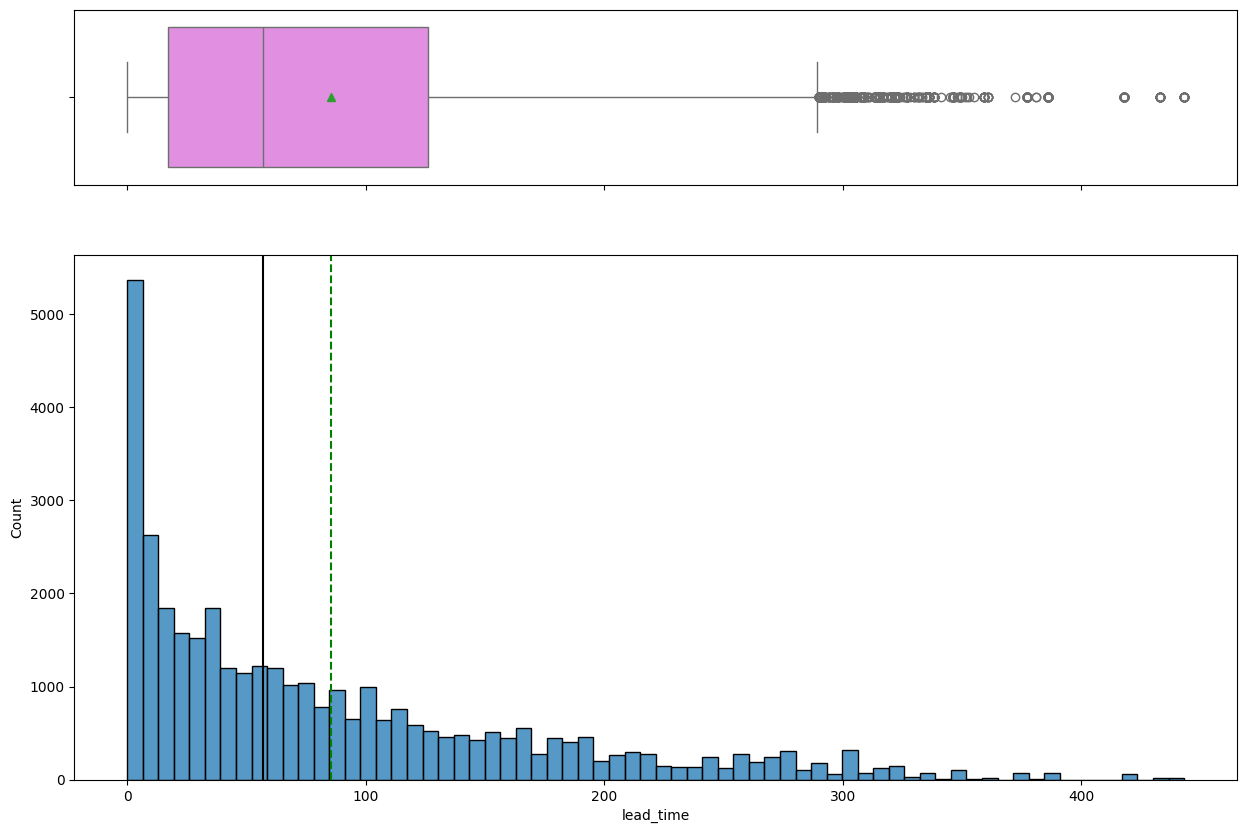

In [ ]:
histogram_boxplot(df, "lead_time")

.The distribution of lead time is skewed to the right with some outliers.

. There are more guests that make a very short time booking very close to their intended arrival date than guests that make a reservation a longer time from when they checked into the hotel.


**Observation on number of Adults**

In [ ]:
df.no_of_adults.unique()

array([2, 1, 3, 0, 4], dtype=int64)

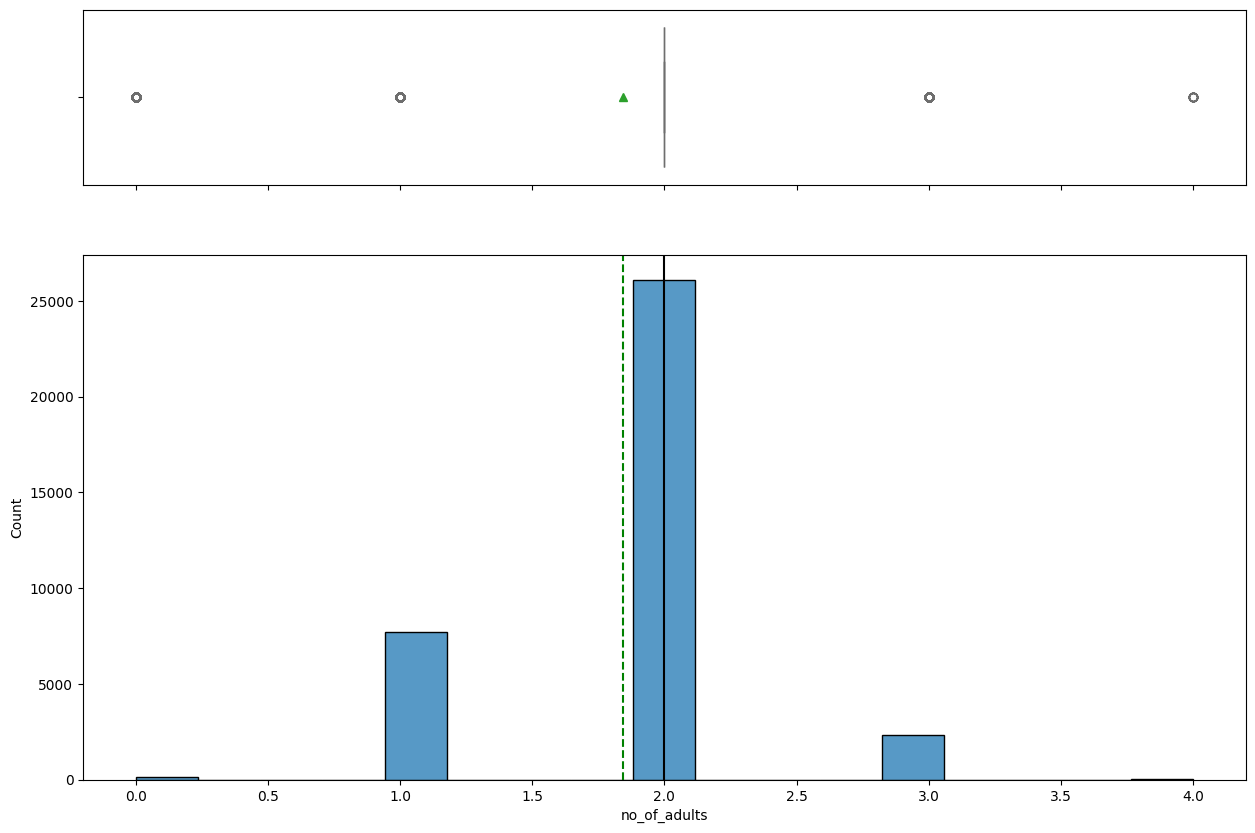

In [ ]:
histogram_boxplot(df, "no_of_adults")

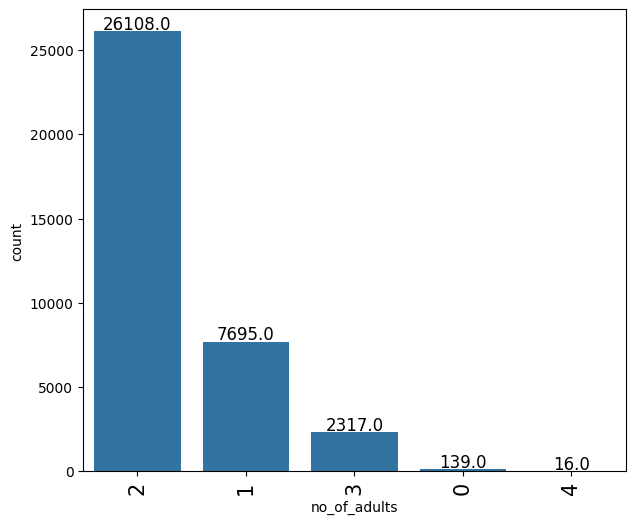

In [ ]:
# create a labeled barplot for Number of Adults
labeled_barplot(df,"no_of_adults")

.The distribution is likely normal with scatered and a few outliers on both sides.

.Majority of the bookings have 2 adults followed by bookings with 1 adult and bookings with 3 adults.

.There are bookings without a single aldult, and there are a few of the bookings with 4 adults.

**Observation on number of Children**

In [ ]:
df.no_of_children.unique()

array([ 0,  2,  1,  3, 10,  9], dtype=int64)

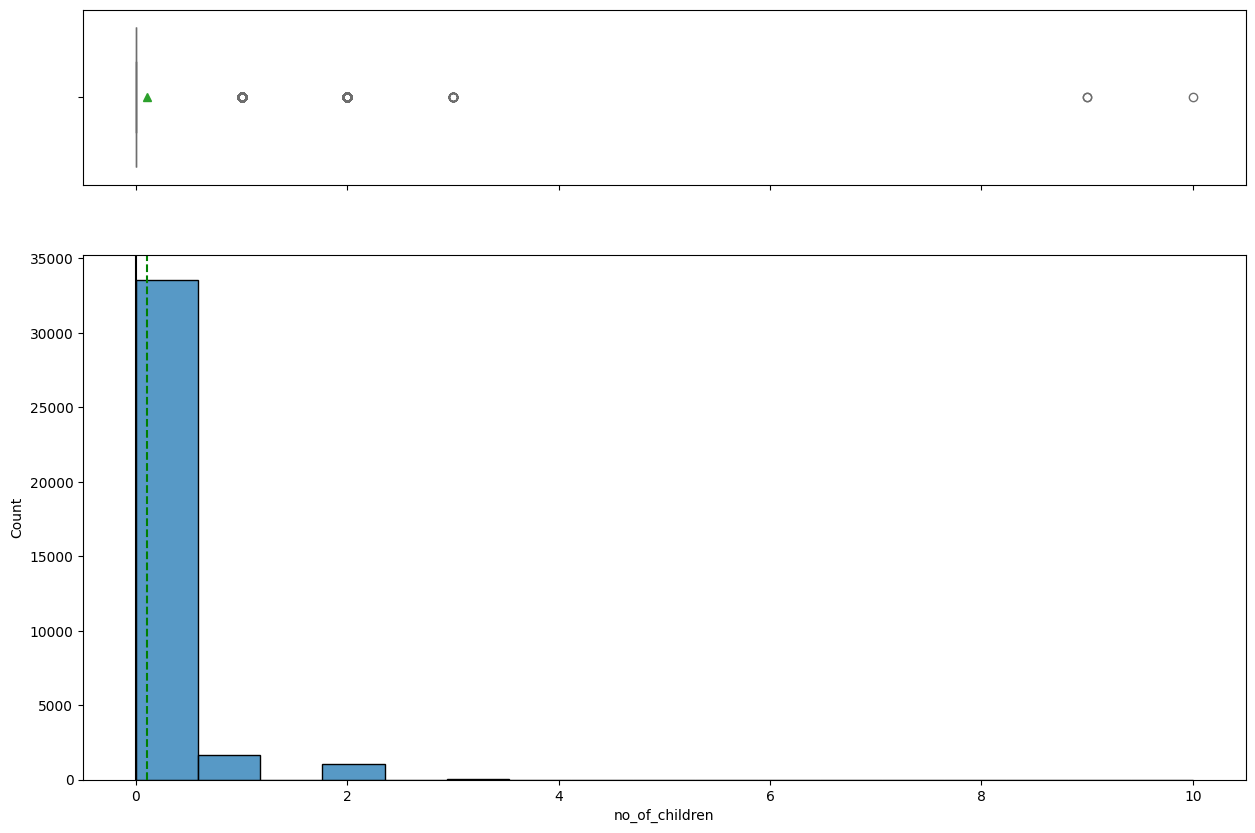

In [ ]:
histogram_boxplot(df, "no_of_children")

In [ ]:
# replacing 9, and 10 children with 3, other above 3 portray outliers
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

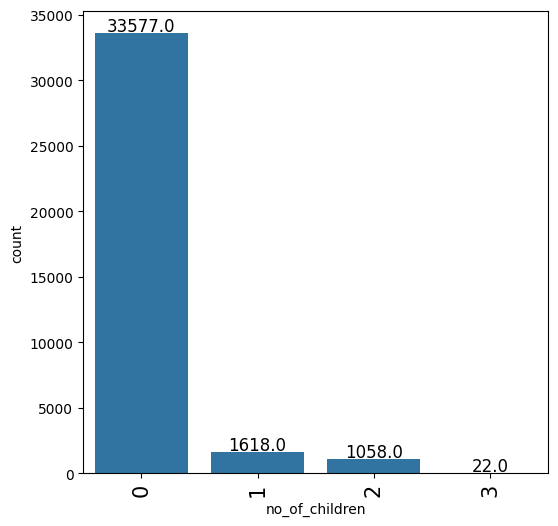

In [ ]:
# create a labeled barplot for Number of Children
labeled_barplot(df,"no_of_children")

.The distribution is right skewed and with a few outliers on the left.

.Majority of the bookings are without a single child.

.Bookings with 1 and 2 children are the highest.


**Observation on number of Week Nights**

In [ ]:
df.no_of_week_nights.unique()

array([ 2,  3,  1,  4,  5,  0, 10,  6, 11,  7, 15,  9, 13,  8, 14, 12, 17,
       16], dtype=int64)

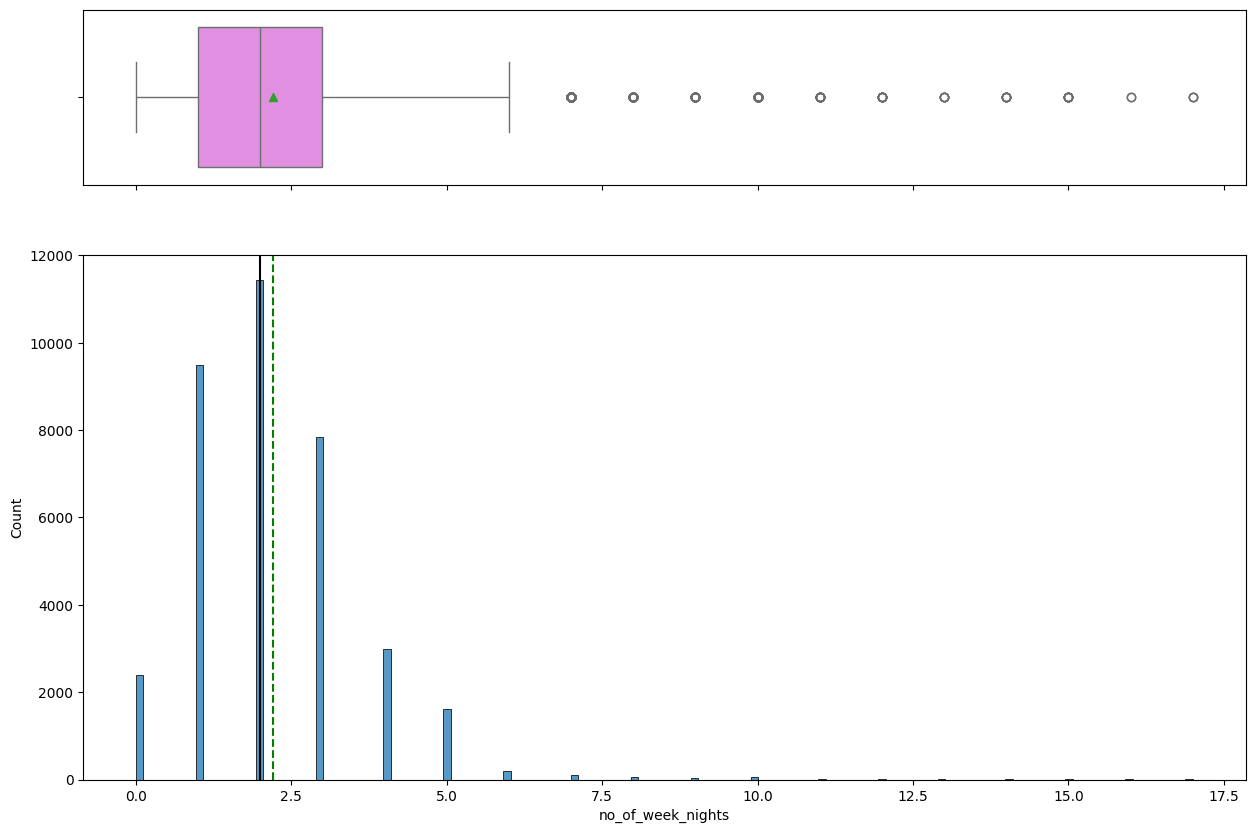

In [ ]:
histogram_boxplot(df, "no_of_week_nights")

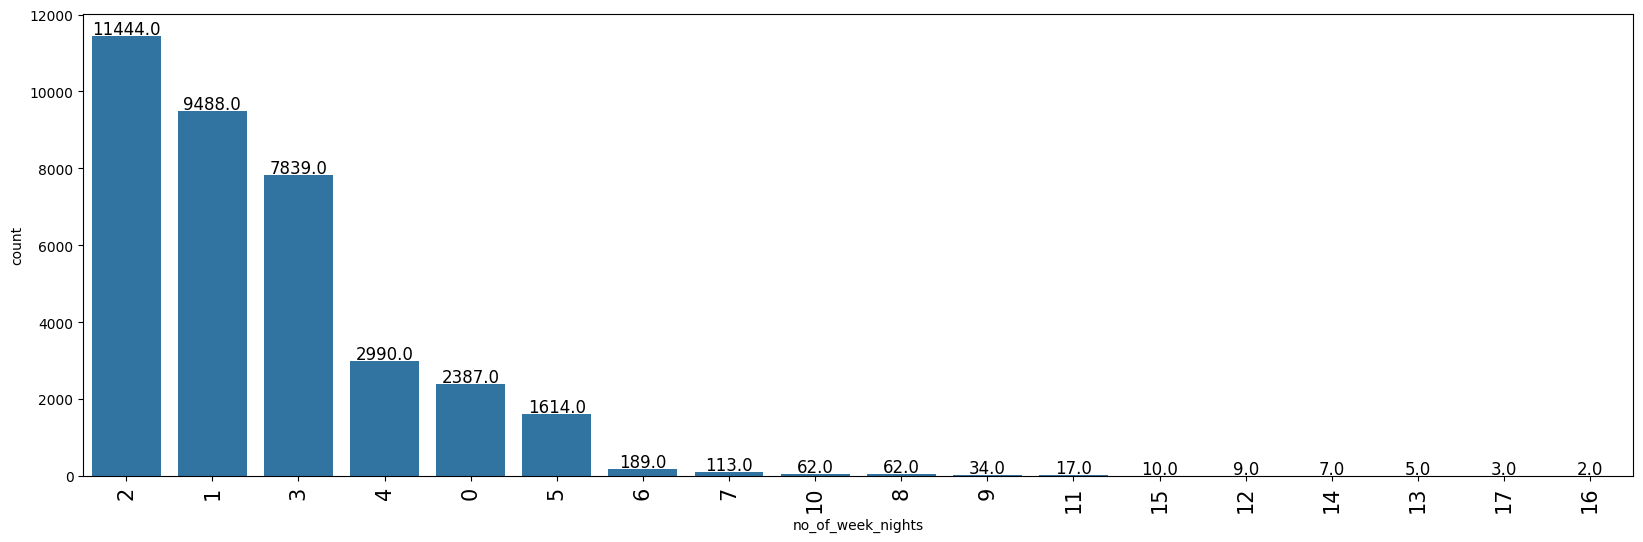

In [ ]:
# create a labeled barplot for Number of Week Nights
labeled_barplot(df,"no_of_week_nights")

.  There are specific number of week nights that different guests haved booked or stayed at the hotel.

.  1,2, and 3 inclusive of number of week nights were booked most by the hotel guests.

.  The booking of between 6 and 17(inclusive) week nights are the least.

.  Its distribution is right skewed with some outliers on the right.

. Its mean is close to its median.

**Observation on number of weekend Nights**

In [ ]:
df.no_of_weekend_nights.unique()

array([1, 2, 0, 4, 3, 6, 5, 7], dtype=int64)

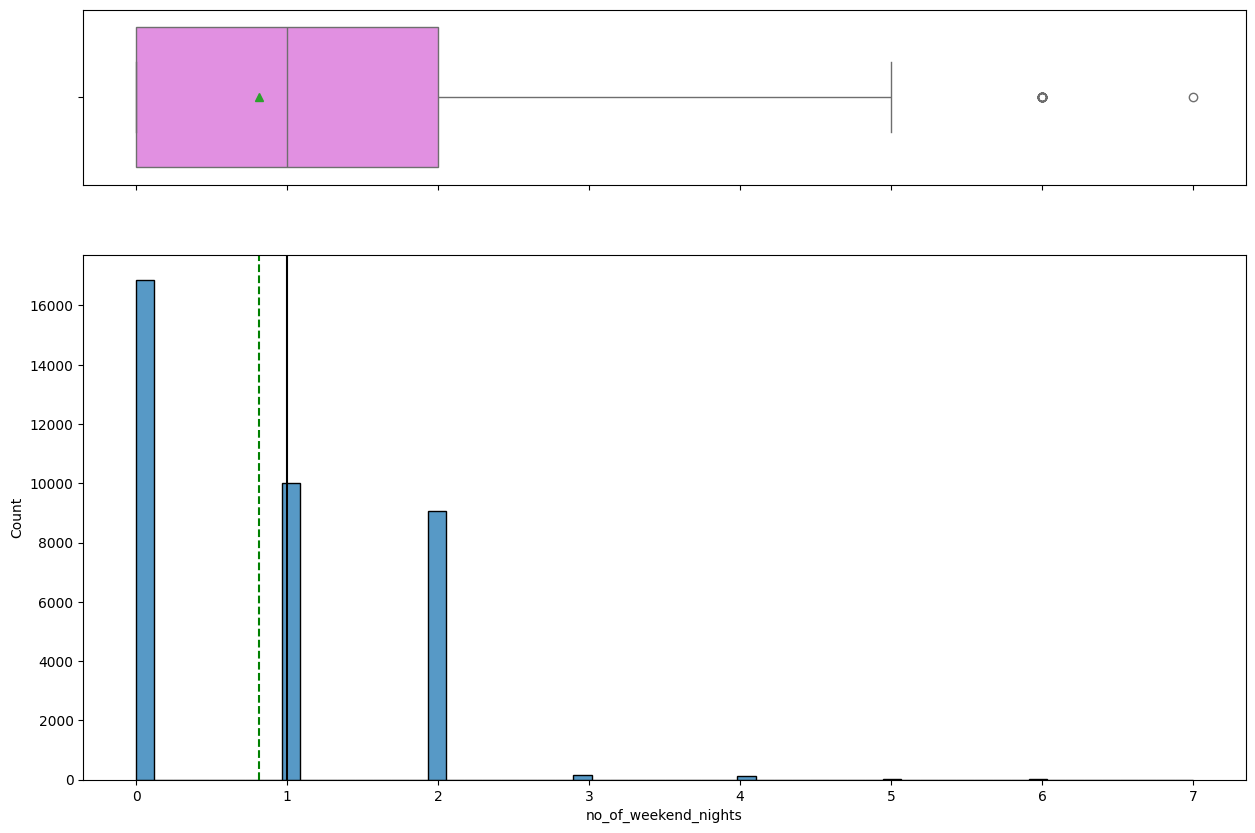

In [ ]:
histogram_boxplot(df, "no_of_weekend_nights")

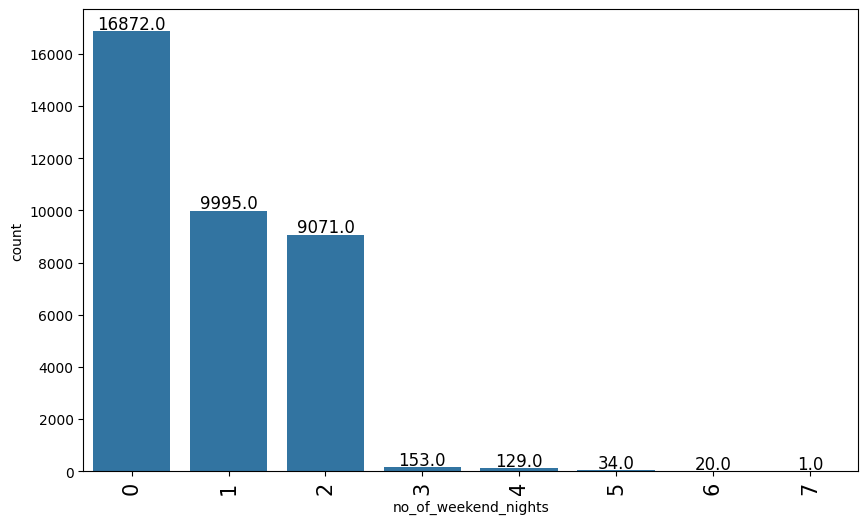

In [ ]:
# create a labeled barplot for Number of Weekend Nights
labeled_barplot(df,"no_of_weekend_nights")

.  There are specific number of weekend nights that different guests haved booked or stayed at the hotel.

.  Between 0 and 2 inclusive of number of weekend nights were booked most by the hotel guests.

.  The booking of between 3 and 7 weekend nights are the least.

.  Its distribution is right skewed with a few outliers on the right.

. Its mean is not too close to its median.

**Observation on required Car Parking Space**

In [ ]:
df.required_car_parking_space.unique()

array([0, 1], dtype=int64)

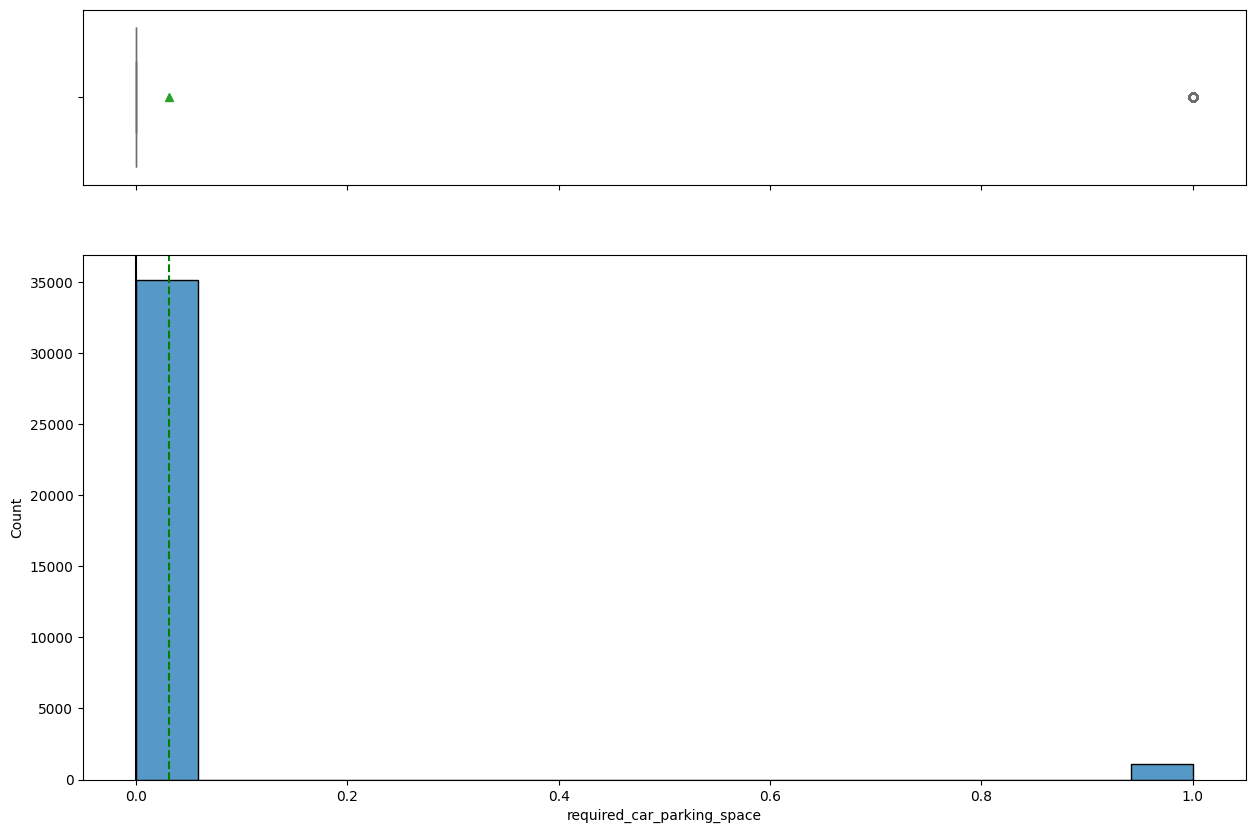

In [ ]:
histogram_boxplot(df, "required_car_parking_space")

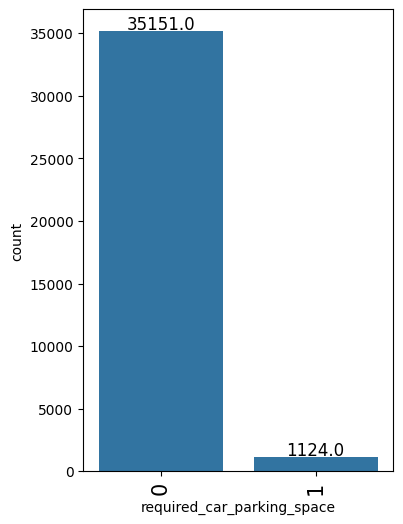

In [ ]:
# create a labeled barplot for Required Car parking Space
labeled_barplot(df,"required_car_parking_space")

. Large number of hotel guests do not require parking space.

. '0' typically indicates that the customer does not require a car parking space and it is highest.

'1' typically indicates that the customer does require a car parking space and it is the least.

. Its distribution is left skewed..

**Observation on Arrival Year**

In [ ]:
df.arrival_year.unique()

array([2017, 2018], dtype=int64)

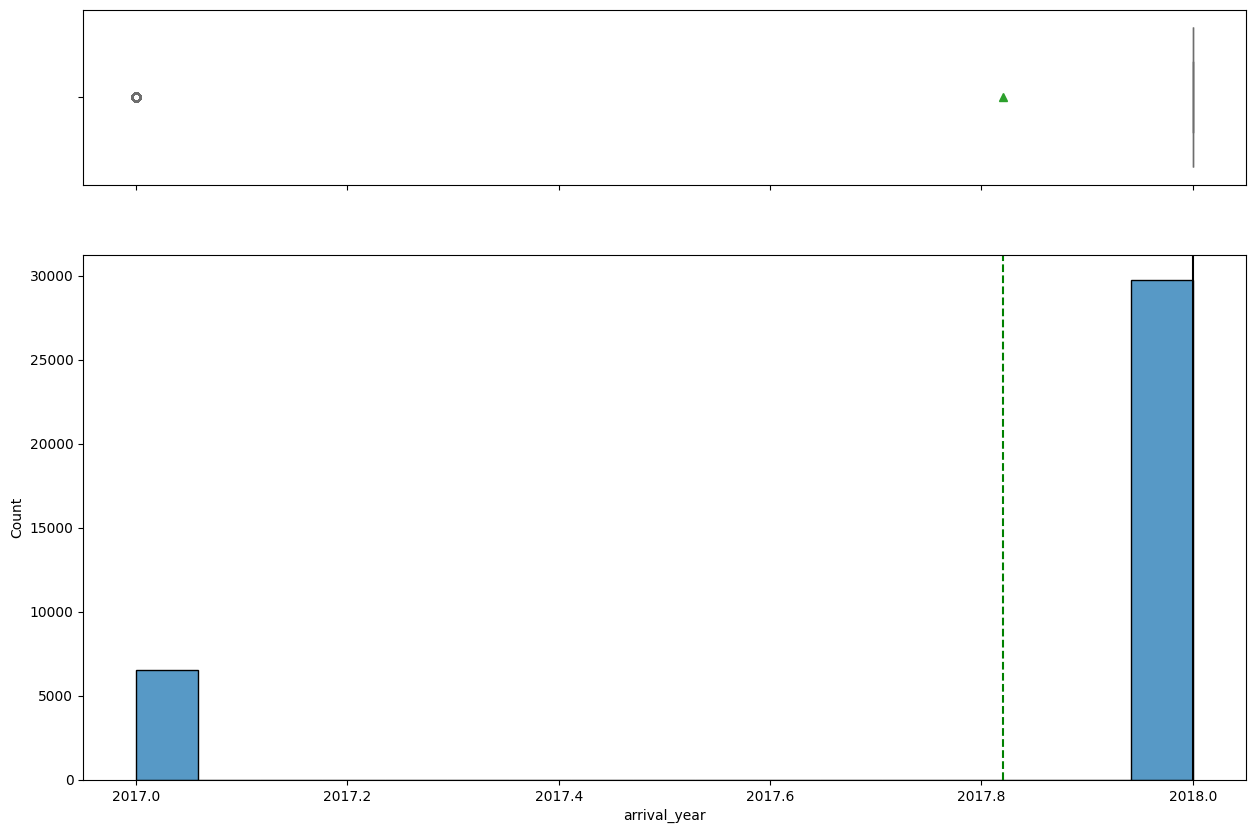

In [ ]:
histogram_boxplot(df, "arrival_year")

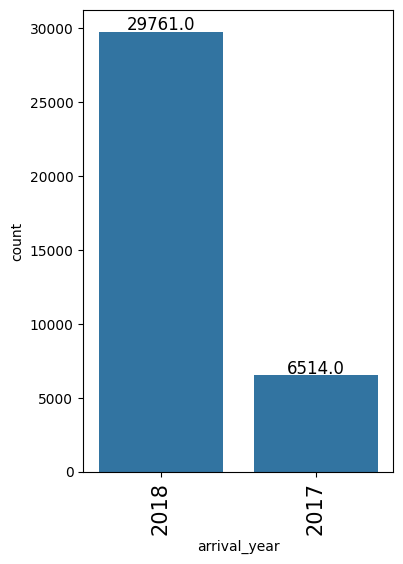

In [ ]:
# create labeled_barplot for arrival month
labeled_barplot(df, 'arrival_year')

. 2018 recorded the highest booking, and 2017 the lowest.

. Its distribution is right skewed.

**Observation on Arrival Month**

In [ ]:
df.arrival_month.unique()

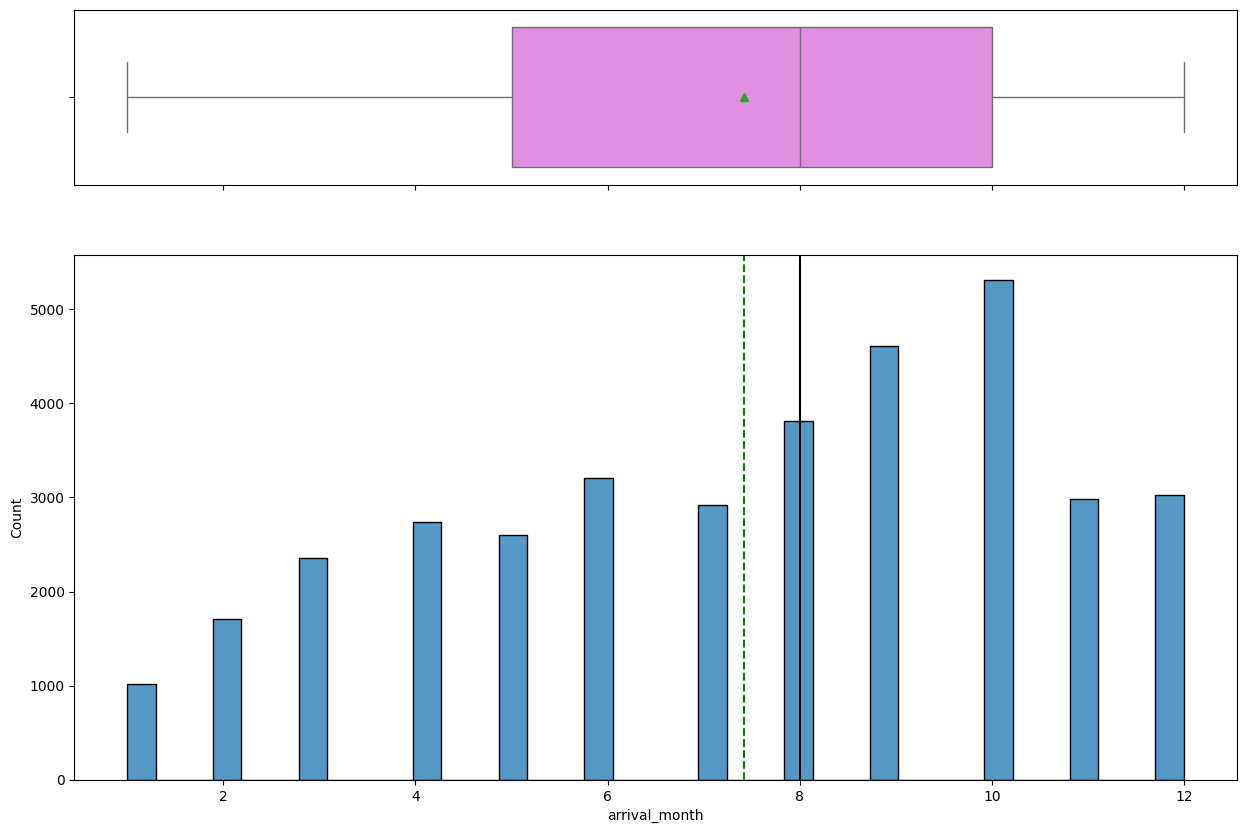

In [ ]:
histogram_boxplot(df, "arrival_month")

**What is the busiest month?**

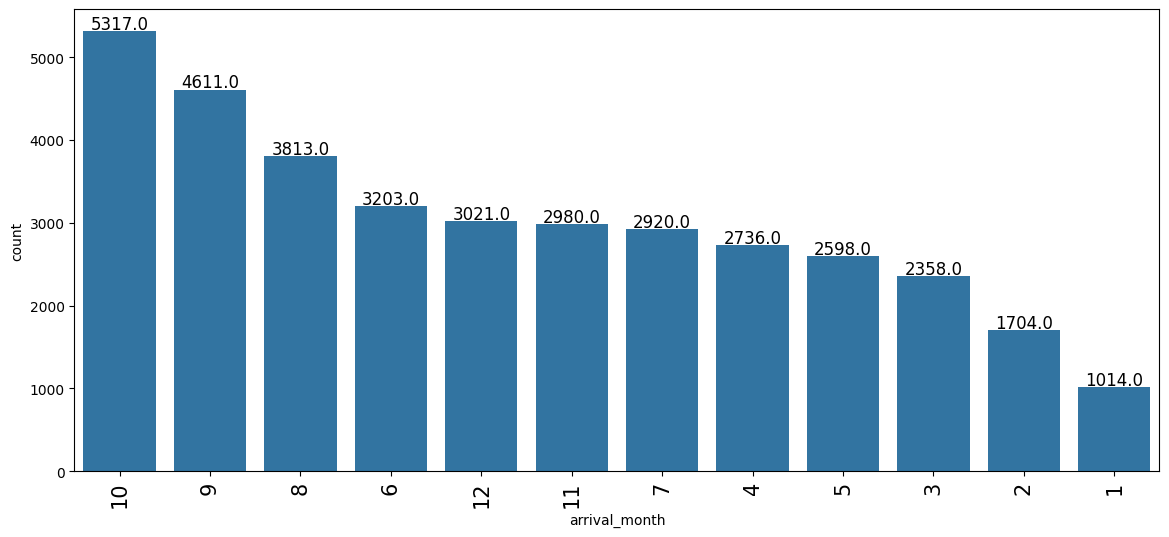

In [ ]:
# create labeled_barplot for arrival month
labeled_barplot(df, 'arrival_month')

. The distribution is left skewed.

. The tenth month received the highest check-in of guests followed by the nineth month.

.The first month has the least arrival of guests at the INN hotel.

**Observation on Arrival Date**

In [ ]:
df.arrival_date.unique()

array([ 2,  6, 28, 20, 11, 13, 15, 26, 18, 30,  5, 10,  4, 25, 22, 21, 19,
       17,  7,  9, 27,  1, 29, 16,  3, 24, 14, 31, 23,  8, 12],
      dtype=int64)

In [ ]:
histogram_boxplot(df, "arrival_date")

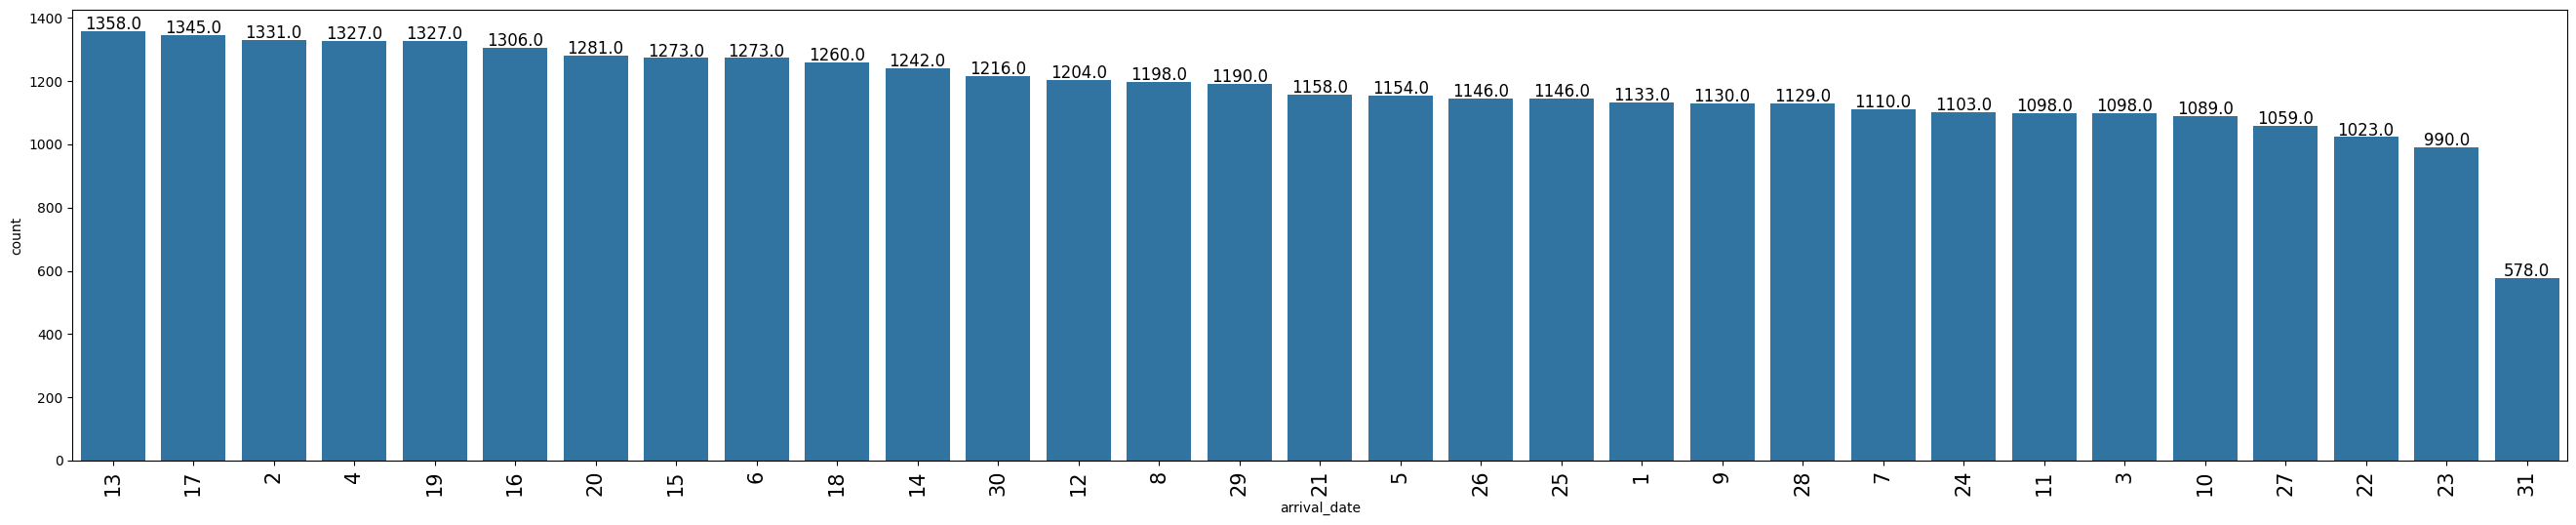

In [ ]:
 # create labeled_barplot for arrival month
 labeled_barplot(df, 'arrival_date')

. The distribution is almost normal, median and mean are close.

. The 13th day of arrival has the highest number of guests followed by 31st day of the arrival month.

**Observations on number of Repeated Guests**

In [ ]:
df.repeated_guest.unique()

array([0, 1], dtype=int64)

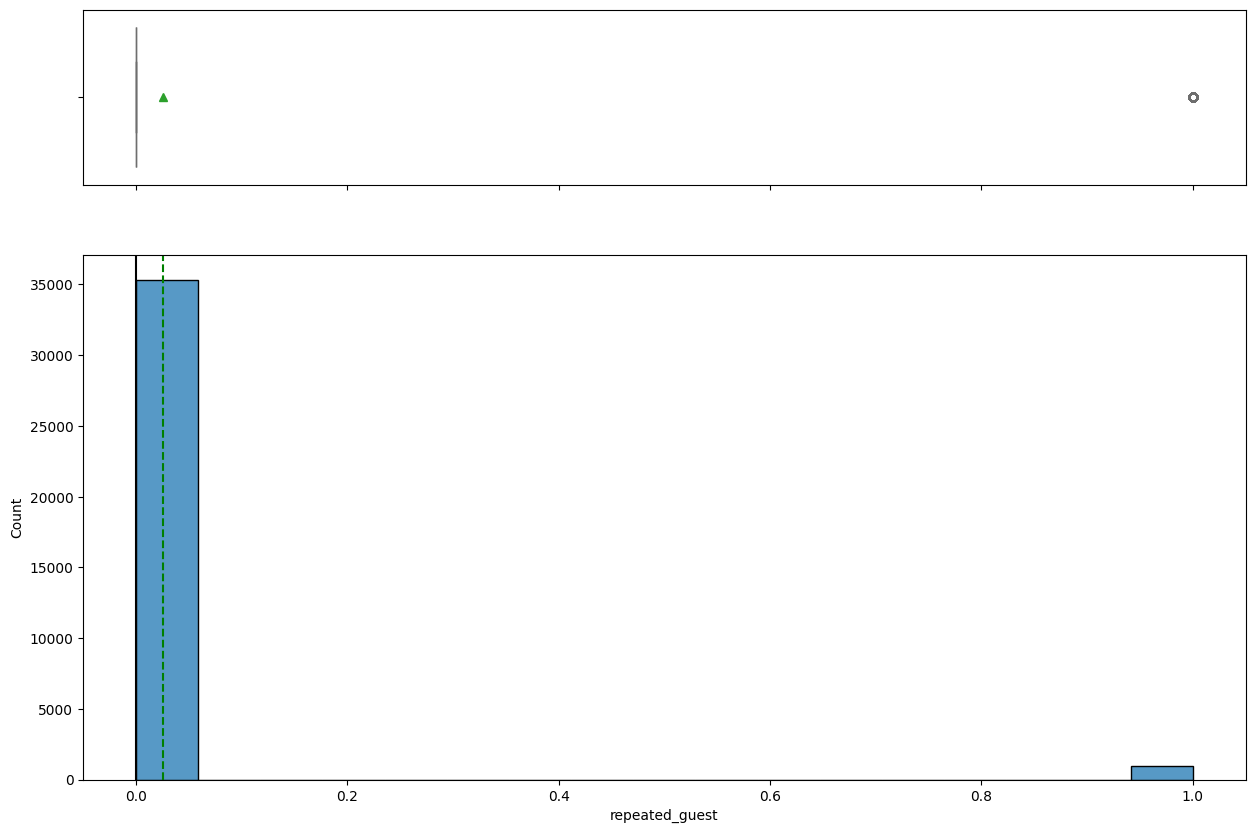

In [ ]:
histogram_boxplot(df, "repeated_guest")

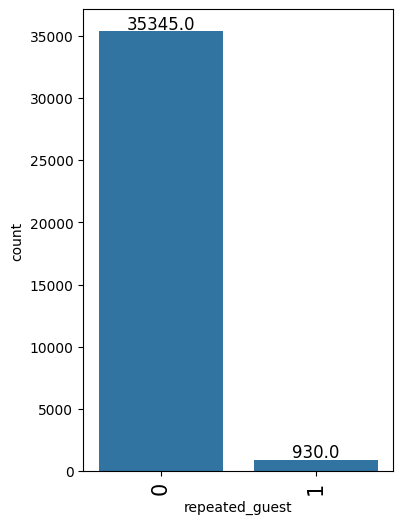

In [ ]:
# create a labeled barplot for repeated guest
labeled_barplot(df, 'repeated_guest')

. The number of unrepeated guests('0') is higher than repeated guest('1').

. The distribution is left skewed.

**Observations on number of Special Requests**

In [ ]:
df.no_of_special_requests.unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

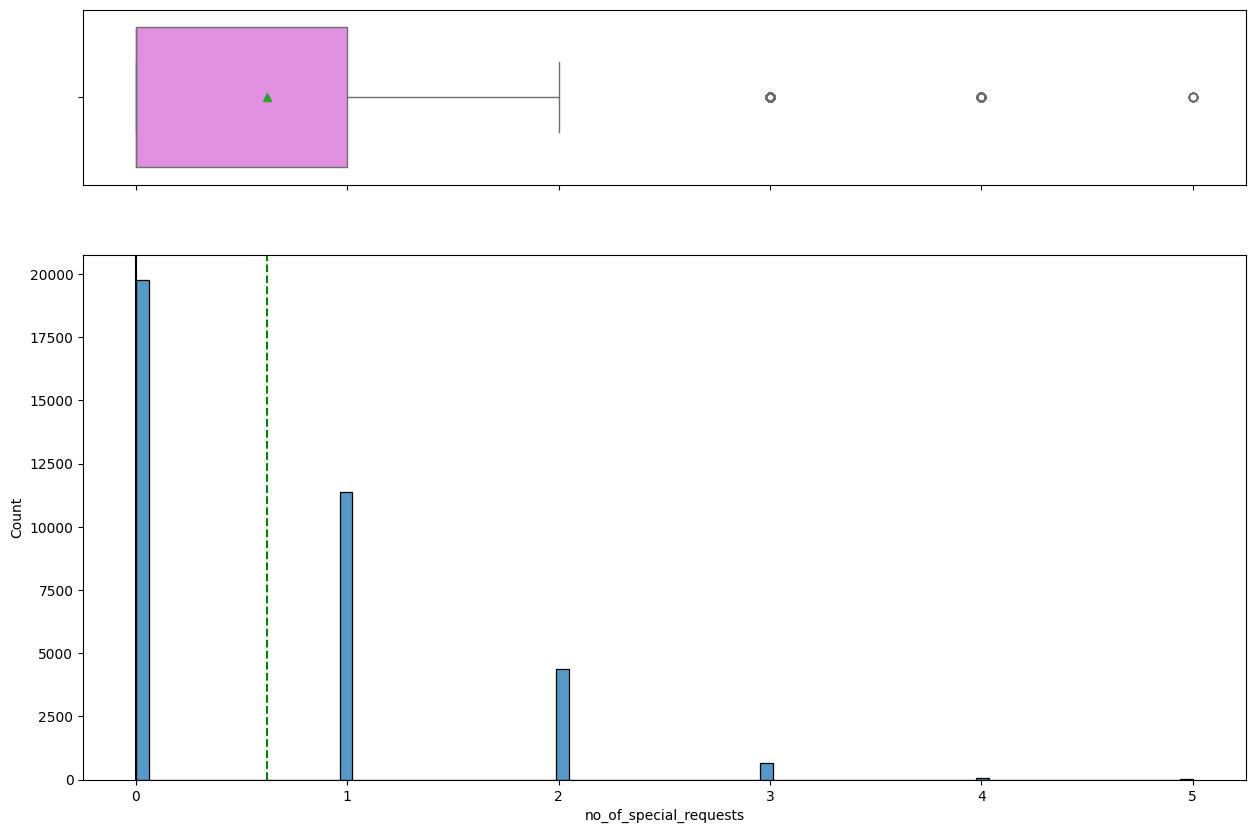

In [ ]:
  histogram_boxplot(df,"no_of_special_requests")

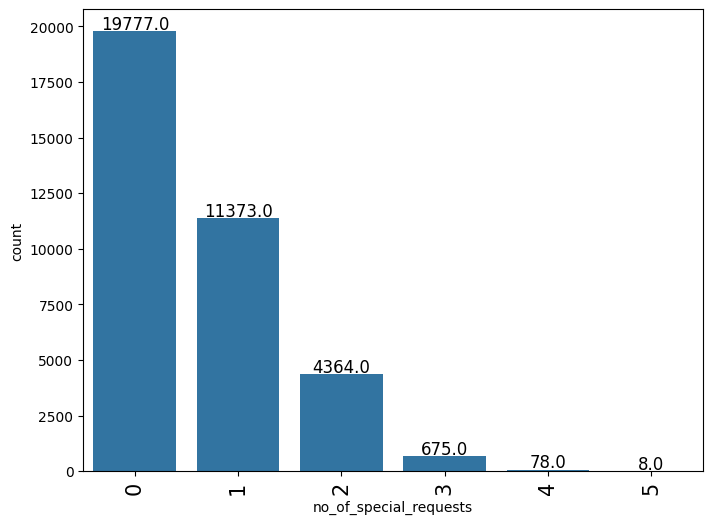

In [ ]:
labeled_barplot(df,"no_of_special_requests")

. There are more special request ('0').

. The least special request is '5'.

. These special requests are not exclusively given.

. The distribution is left skewed.

**Observations on average price per room**

In [ ]:
df.avg_price_per_room.unique()

array([ 65.  , 106.68,  60.  , ..., 118.43, 137.25, 167.8 ])

In [ ]:
histogram_boxplot(df, "avg_price_per_room")


.The distribution of the average price per room is right skewed with outliers on both sides.


In [ ]:
# creating a subset of the original DataFrame data containing only those rows where the average price per room is equal to 0
df[df["avg_price_per_room"] == 0]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
63                1               0                     0                  1   
145               1               0                     0                  2   
209               1               0                     0                  0   
266               1               0                     0                  2   
267               1               0                     2                  1   
...             ...             ...                   ...                ...   
35983             1               0                     0                  1   
36080             1               0                     1                  1   
36114             1               0                     0                  1   
36217             2               0                     2                  1   
36250             1               0                     0                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
63          Meal Plan 1                           0        Room_Type 1   
145         Meal Plan 1                           0        Room_Type 1   
209         Meal Plan 1                           0        Room_Type 1   
266         Meal Plan 1                           0        Room_Type 1   
267         Meal Plan 1                           0        Room_Type 1   
...                 ...                         ...                ...   
35983       Meal Plan 1                           0        Room_Type 7   
36080       Meal Plan 1                           0        Room_Type 7   
36114       Meal Plan 1                           0        Room_Type 1   
36217       Meal Plan 1                           0        Room_Type 2   
36250       Meal Plan 2                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
63             2          2017              9            10   
145           13          2018              6             1   
209            4          2018              2            27   
266            1          2017              8            12   
267            4          2017              8            23   
...          ...           ...            ...           ...   
35983          0          2018              6             7   
36080          0          2018              3            21   
36114          1          2018              3             2   
36217          3          2017              8             9   
36250          6          2017             12            10   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
63          Complementary               0                             0   
145         Complementary               1                             3   
209         Complementary               0                             0   
266         Complementary               1                             0   
267         Complementary               0                             0   
...                   ...             ...                           ...   
35983       Complementary               1                             4   
36080       Complementary               1                             3   
36114              Online               0                             0   
36217              Online               0                             0   
36250              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
63                                        0             0.00000   
145                                       5             0.00000   
209                                       0             0.00000   
266                                       1             0.00000   
267                                       0             0.00000   
...                                     ...                 ...   
35983                         

**Observations on average price per room**

**Standardizing "avg_price_per_room" with "market_segment_type"**

In [ ]:
# identify and count the occurrences of different market segments for bookings where the average price per room is set to 0.
df.loc[df["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

In [ ]:
# Calculating the 25th quantile
Q1 = df["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = df["avg_price_per_room"].quantile(0.75)  ## Complete the code to calculate 75th quantile for average price per room

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [ ]:
# assigning the outliers the value of upper whisker
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

**Observation on Type of meal plan**

In [ ]:
df.type_of_meal_plan.unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

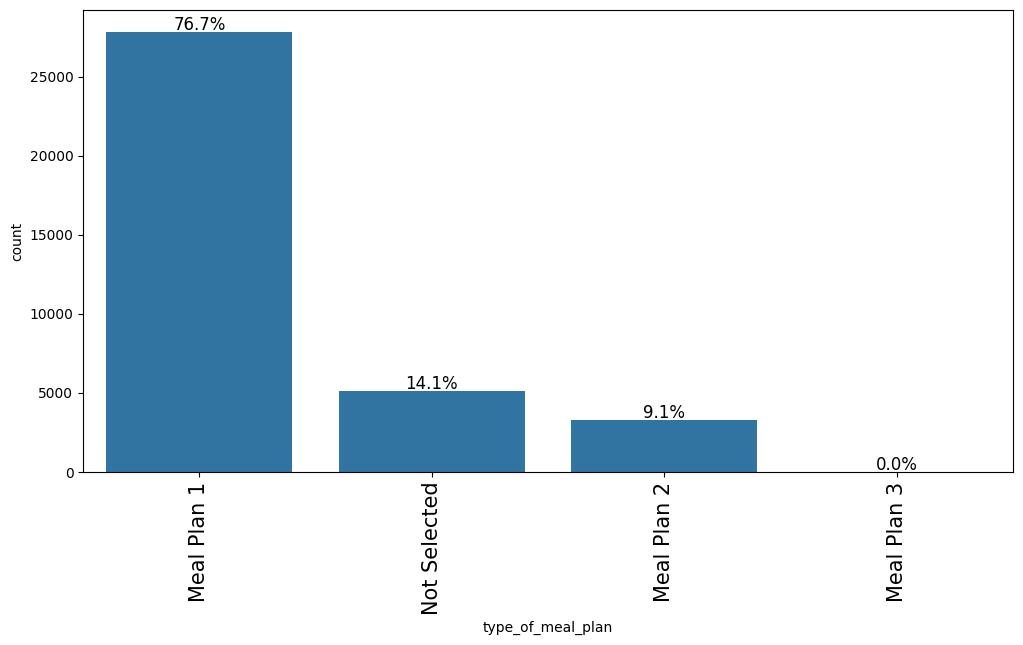

In [ ]:
# Plot the labeled barplot for the type of meal plan
labeled_barplot(df, "type_of_meal_plan", perc=True, n=10)

.'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'

.The Meal Plan 1 has the highest request and the least is Meal Plan 3.

**Observation on Room Type Reserved**

In [ ]:
df.room_type_reserved.unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

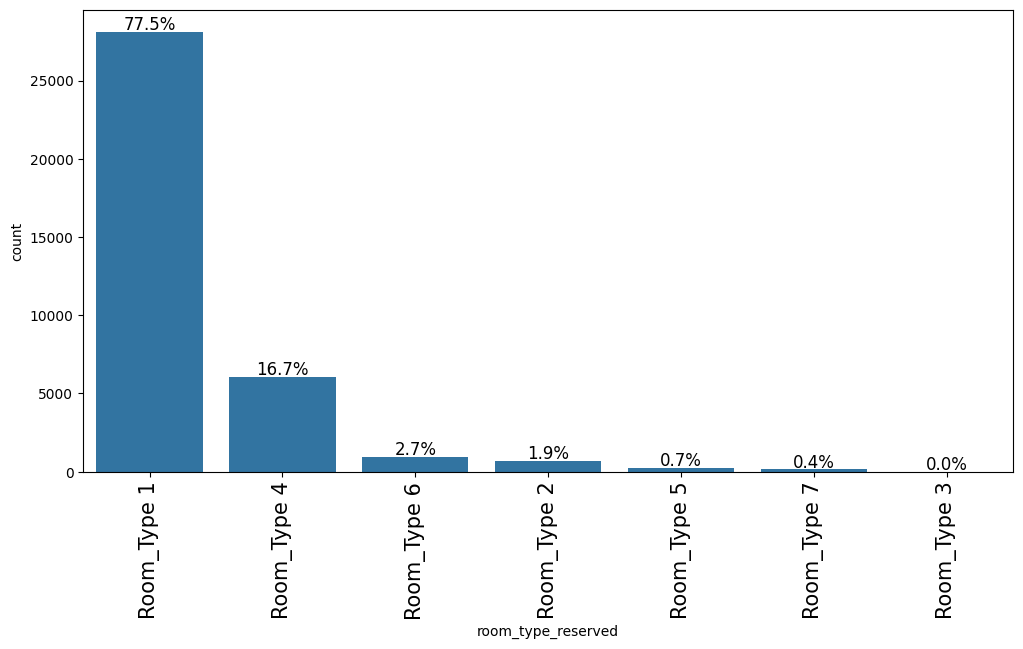

In [ ]:
# Plot the labeled barplot for the room type reserved
labeled_barplot(df, "room_type_reserved", perc=True, n=10)

.Room_Type 1 has the highest request and the least is Room_Type 7. There is no request at all for Room_Type 3.

**Observation on Market Segment Type**

In [ ]:
df.market_segment_type.unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

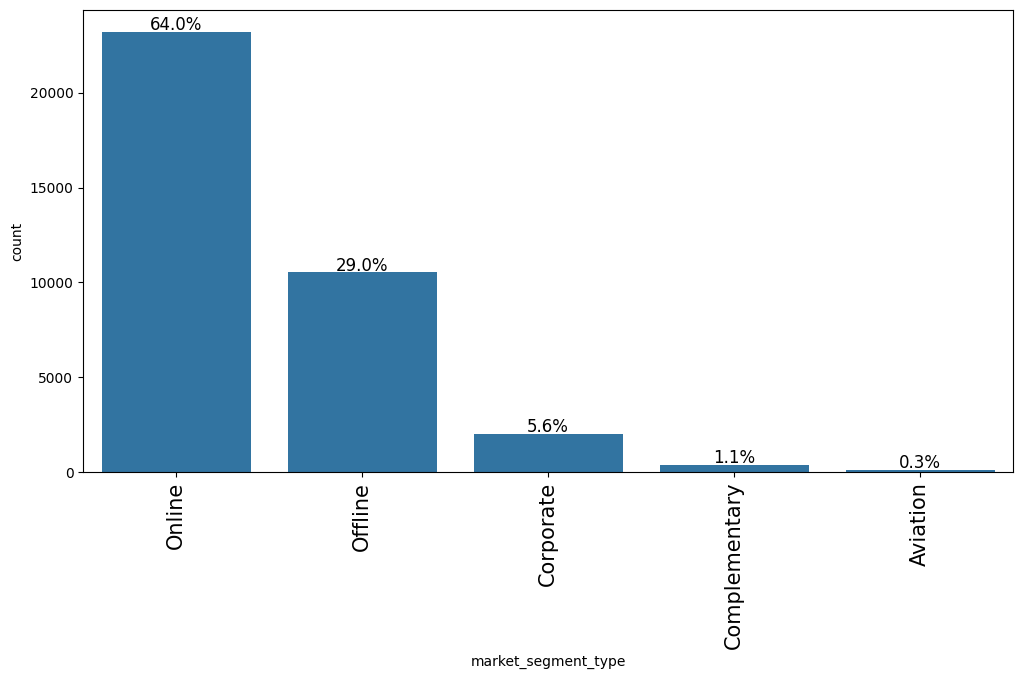

In [ ]:
# Plot the labeled barplot for the market segment type
labeled_barplot(df, "market_segment_type", perc=True, n=10)

. Online market segment type has the highest booking, and the least is Aviation market segment type.

**Observation on Booking Status**

**What percentage of bookings are cancelled?**

In [ ]:
df.booking_status.unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

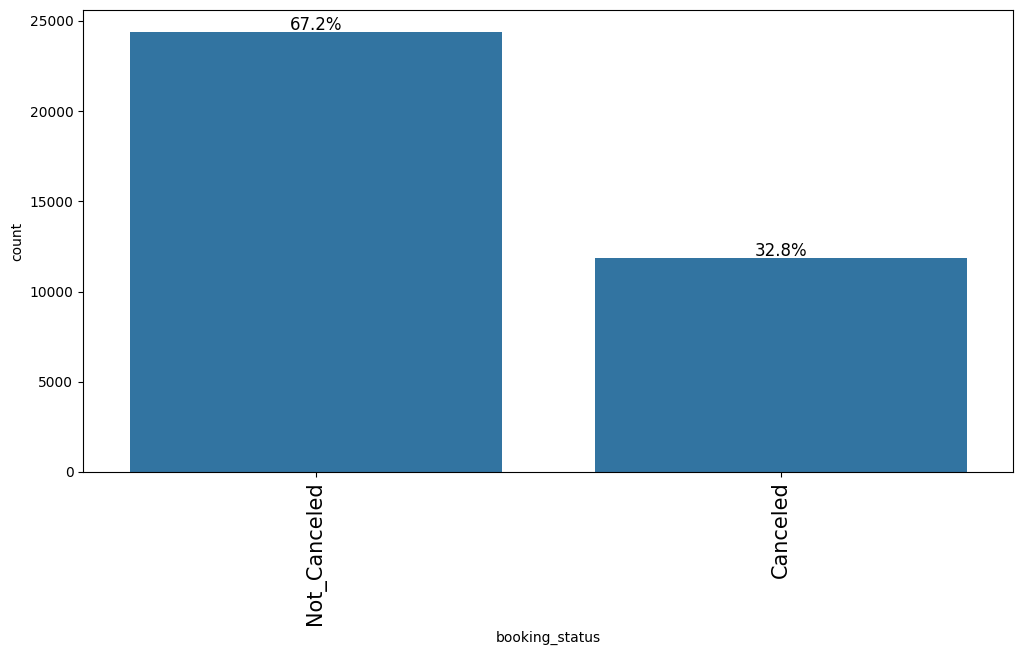

In [ ]:
# Plot the labeled barplot for Booking Status
labeled_barplot(df, "booking_status", perc=True, n=10)

.32.8% of bookings are canceled and 67.2% of the bookings are not canceled.

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [ ]:
df["booking_status"] = df["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

**Bivariate Analysis**

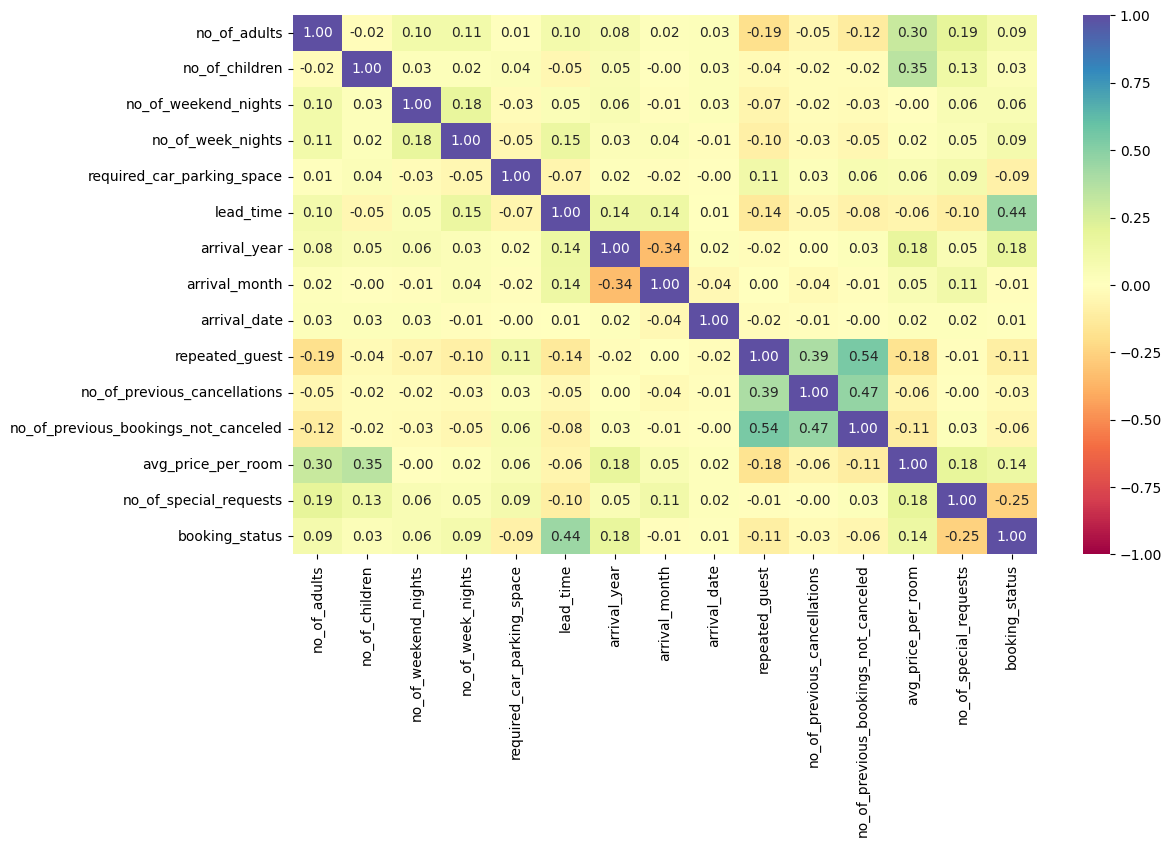

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

. 'Number of previous cancellations' has a weak positive correlation with 'number of previous bookings not canceled' and
   is positive weakly correlated with repeated guests.

. 'Number of previous cancellations' has negative correlation with other variables.

. 'Number of previous bookings not canceled' has a positive correlation with repeated guests.

. Booking Status has weak positive correlation with Lead Time.

.Booking status has very weak positive relationship with average price per room.

**Creating functions that will help us with further analysis**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**What are the variation in room prices in different market segment?**

Summary of Room Price Variation Across Market Segments:
                          count      mean      std      min      25%  \
market_segment_type                                                    
Aviation              125.00000 100.70400  8.53836 79.00000 95.00000   
Complementary         391.00000   3.14176 15.51297  0.00000  0.00000   
Corporate            2017.00000  82.91174 23.69000 31.00000 65.00000   
Offline             10528.00000  91.59844 24.62552 12.00000 75.00000   
Online              23214.00000 112.25685 35.22032  0.00000 89.00000   

                          50%       75%       max  
market_segment_type                                
Aviation             95.00000 110.00000 110.00000  
Complementary         0.00000   0.00000 170.00000  
Corporate            79.00000  95.00000 220.00000  
Offline              90.00000 109.00000 365.00000  
Online              107.10000 131.75000 375.50000  


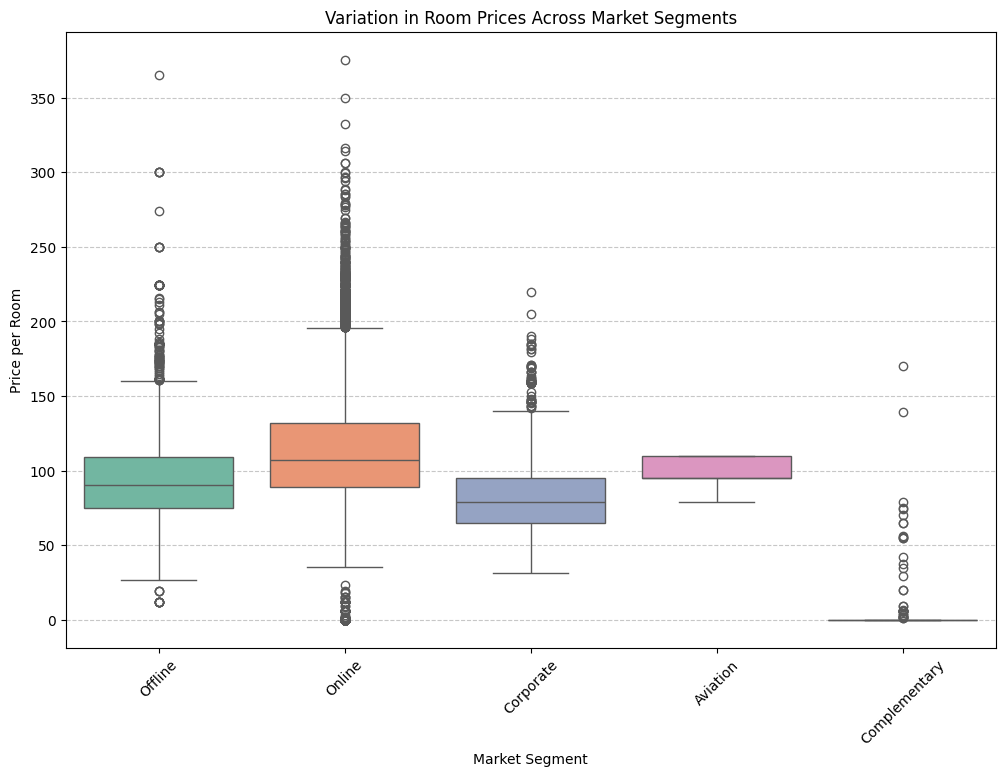

In [ ]:
 # Calculate and display summary statistics of room prices by market segment
segment_summary = df.groupby('market_segment_type')['avg_price_per_room'].describe()

# Create a box plot to show the variation in room prices across different market segments
plt.figure(figsize=(12, 8))
sns.boxplot(x='market_segment_type', y='avg_price_per_room', data=df, palette='Set2')
plt.title('Variation in Room Prices Across Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Price per Room')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display a summary of room price variation by market segment
print("Summary of Room Price Variation Across Market Segments:")
print(segment_summary)

plt.show()

.The summary of the variation in room prices in different market segment is captured in the plot.

. The average price per room for market segments: Aviation, Complementary, Corporate, Offline, and Online
   are ~101,~3,~83,~92, and ~112 respectively

**Which market segment do most of the guests come from?**

repeated_guest           0    1    All
market_segment_type                   
All                  35345  930  36275
Corporate             1415  602   2017
Complementary          265  126    391
Online               23118   96  23214
Offline              10438   90  10528
Aviation               109   16    125
------------------------------------------------------------------------------------------------------------------------


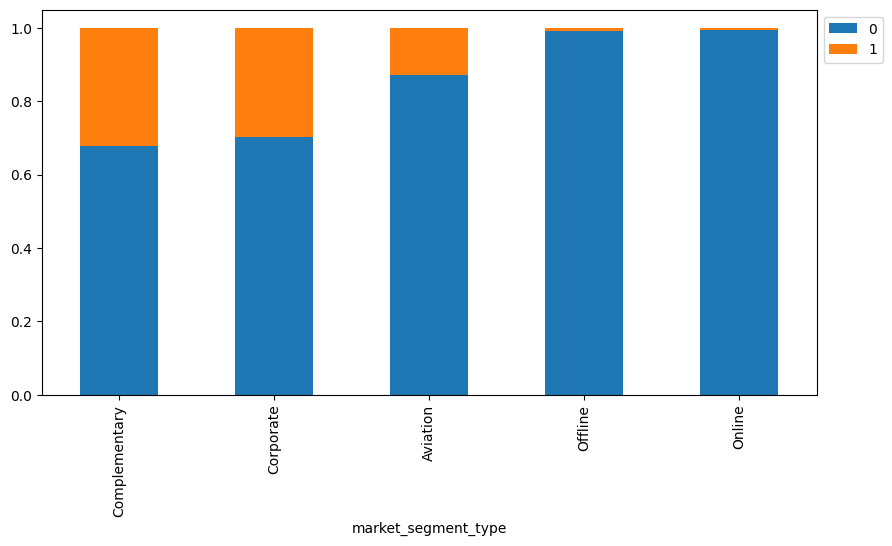

In [ ]:
stacked_barplot(df, "market_segment_type", "repeated_guest")

.Most of the repeated guests come from Corporate market segment followed by Complimentary market segment.

.Both Offline and Online market segments have the least number of repeated guests.

**How special requests by customers affect booking cancellation**

no_of_previous_cancellations      0    1   2   3   4   5  6  11  13    All
no_of_special_requests                                                    
2                              4347    4   1   2   1   7  1   1   0   4364
All                           35937  198  46  43  10  11  1  25   4  36275
0                             19553  153  25  28   3   3  0   8   4  19777
1                             11284   39  14  13   6   1  0  16   0  11373
3                               668    1   6   0   0   0  0   0   0    675
4                                77    1   0   0   0   0  0   0   0     78
5                                 8    0   0   0   0   0  0   0   0      8
------------------------------------------------------------------------------------------------------------------------


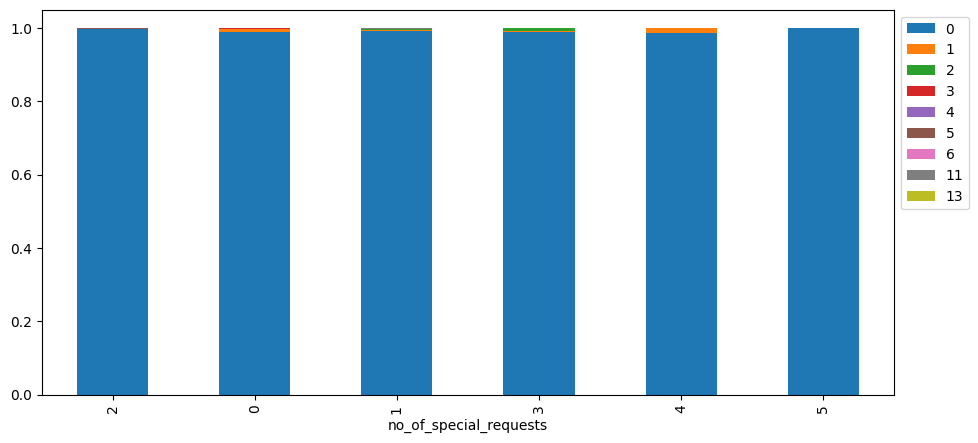

In [ ]:
stacked_barplot(df,'no_of_special_requests' ,'no_of_previous_cancellations')

.Special request '0' has the highest number of cancelations with 0 cancellation being the highest followed by 1 cancellation, and with 6 cancellation
  being the least.

.Special request '5' has the lowest number of cancelations with 0 cancellation being the only one.

**Let's see if the special requests made by the customers impacts the prices of a room**

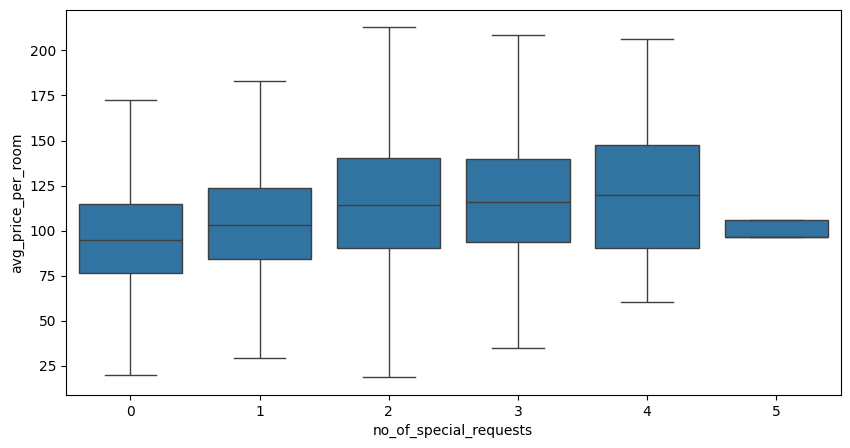

In [ ]:
#create boxplot for no of special requests and average price per room (excluding the outliers)
plt.figure(figsize=(10, 5))
# Create a boxplot with outliers excluded using the 'whis' parameter set to 1.5
sns.boxplot(df, x='no_of_special_requests', y='avg_price_per_room', showfliers=False)
plt.show()

. Type 2 special request has the highest average price per room followed by Type 3 special request.

. Type 5 special request is the least.

**Booking Status vs Number of previous cancellations**

no_of_previous_cancellations      0    1   2   3   4   5  6  11  13    All
booking_status                                                            
0                             24068  187  46  42  10  11  1  25   0  24390
All                           35937  198  46  43  10  11  1  25   4  36275
1                             11869   11   0   1   0   0  0   0   4  11885
------------------------------------------------------------------------------------------------------------------------


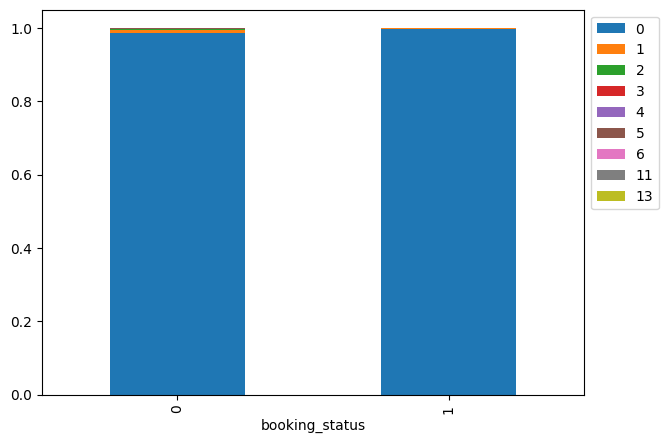

In [ ]:
stacked_barplot(df,'booking_status' ,'no_of_previous_cancellations')

.There are more booking  not canceled' than canceled bookings.
. 0 cancellation and 0 'not canceled' bookings dominate the booking status.

**What percentage of repeating guests cancel?**

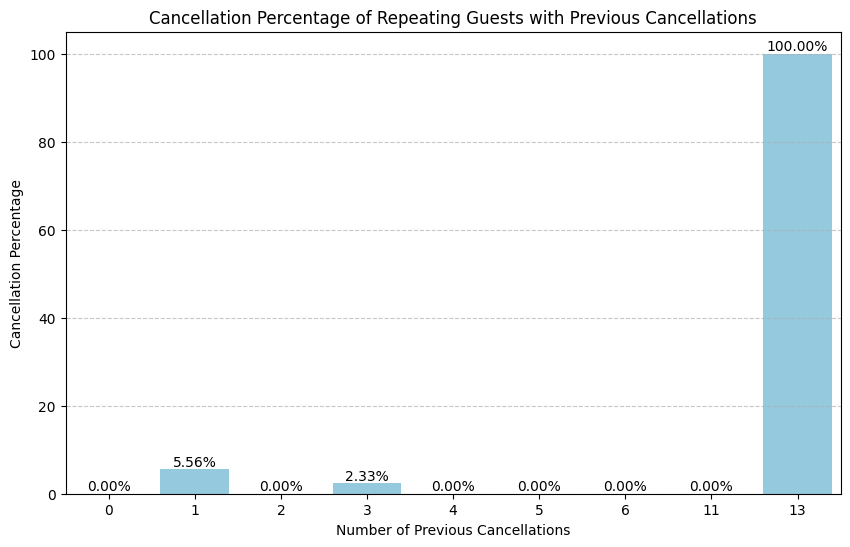

Number of Previous Cancellations per Repeated Guests:
   no_of_previous_cancellations  booking_status
0                             0         0.00000
1                             1         5.55556
2                             2         0.00000
3                             3         2.32558
4                             4         0.00000
5                             5         0.00000
6                             6         0.00000
7                            11         0.00000
8                            13       100.00000


In [ ]:
#Filter for repeating guests
repeating_guests = df[df['repeated_guest'] == 1]

# Calculate the percentage of repeating guests with a certain number of previous cancellations who cancel
cancellation_percentage_per_repeated_guest = repeating_guests.groupby('no_of_previous_cancellations')['booking_status'].mean() * 100
cancellation_percentage_per_repeated_guest = cancellation_percentage_per_repeated_guest.reset_index()

# Plotting the percentage of repeating guests with a certain number of previous cancellations who cancel using a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='no_of_previous_cancellations', y='booking_status', data=cancellation_percentage_per_repeated_guest, color='skyblue')

# Annotate each bar with the percentage value
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, '{:.2f}%'.format(height), ha='center', va='bottom')

plt.title('Cancellation Percentage of Repeating Guests with Previous Cancellations')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Cancellation Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Number of Previous Cancellations per Repeated Guests:")
print(cancellation_percentage_per_repeated_guest)

-From the print-out analysis,repeated guests with 13 previous booking cancellations has 100% cancellation ,and the least goes to repeated guests with 0 previous booking cancellation.

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


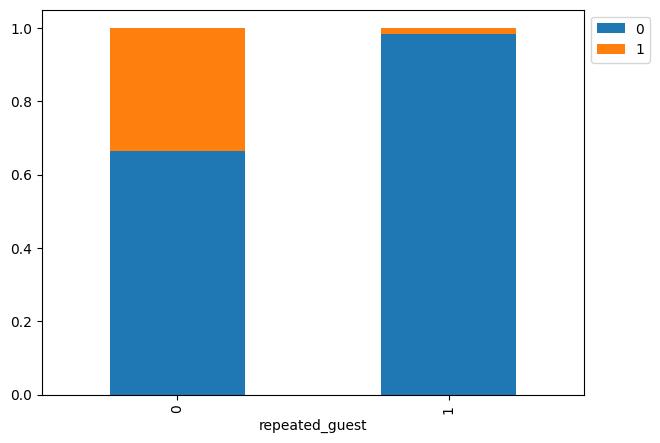

In [ ]:
stacked_barplot(df, 'repeated_guest', 'booking_status')

**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**

In [ ]:
family_data = df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

In [ ]:
family_data["no_of_family_members"] = (family_data["no_of_adults"] + family_data["no_of_children"])

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


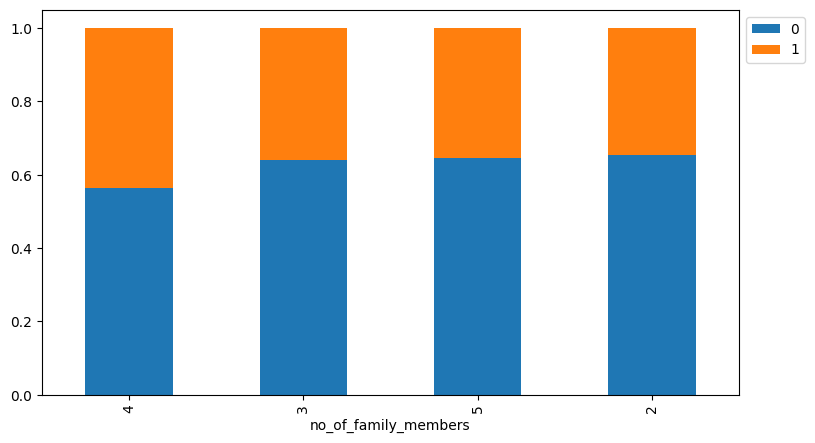

In [ ]:
# stacked barplot for no of family members and booking status
stacked_barplot(family_data, 'no_of_family_members', 'booking_status' )

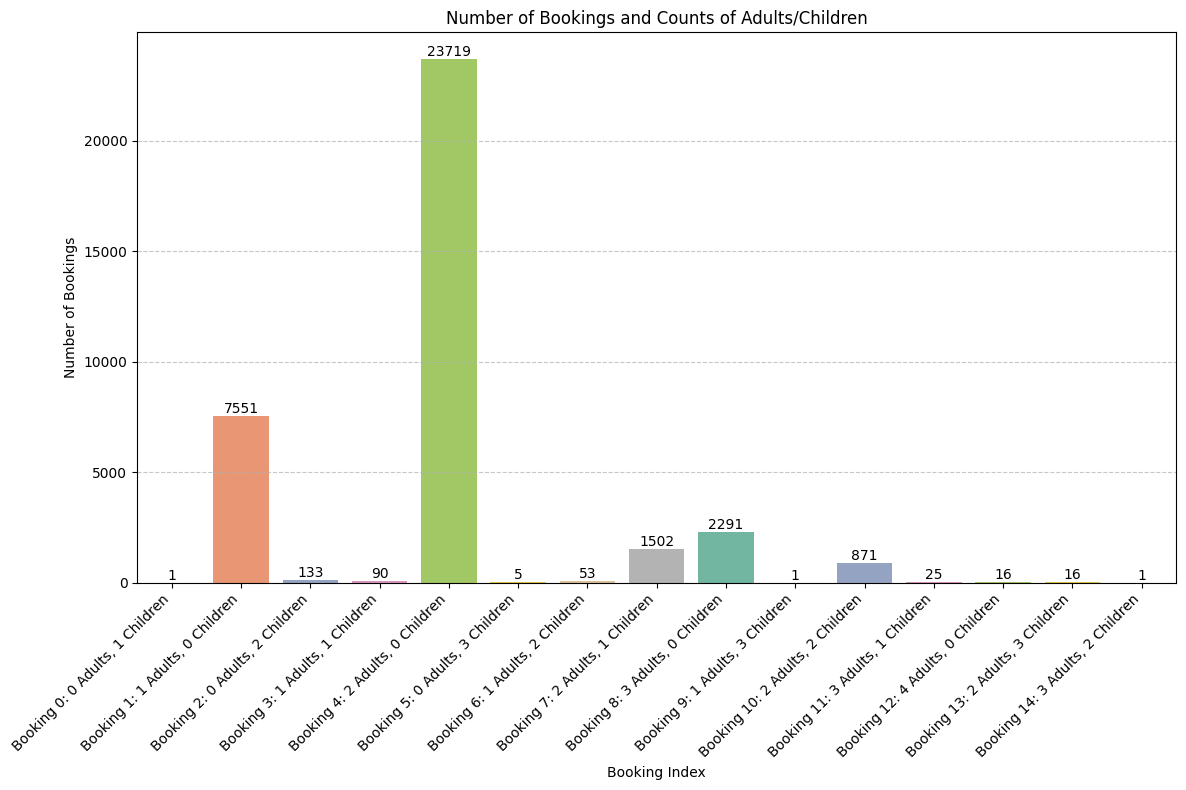

In [ ]:
# Calculate the number of bookings and their corresponding counts of adults and children
booking_counts = df.groupby(['no_of_adults', 'no_of_children']).size().reset_index(name='Booking_Count')

# Sorting the booking counts by total number of guests
booking_counts['Total_Guests'] = booking_counts['no_of_adults'] + booking_counts['no_of_children']
booking_counts = booking_counts.sort_values('Total_Guests').reset_index(drop=True)

# Plotting the data using a bar plot with annotations for no. of adults and children breakdown
plt.figure(figsize=(12, 8))
sns.barplot(x=[f'Booking {i}: {row["no_of_adults"]} Adults, {row["no_of_children"]} Children' for i, row in booking_counts.iterrows()],
            y='Booking_Count', data=booking_counts, palette='Set2')
plt.xlabel('Booking Index')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings and Counts of Adults/Children')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations with the count of bookings on each bar
for index, row in booking_counts.iterrows():
    plt.text(index, row['Booking_Count'], row['Booking_Count'], ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Creating functions that will help us with further analysis**

**Let's see how booking status varies across different market segments. Also, how average price per room impacts booking status**

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


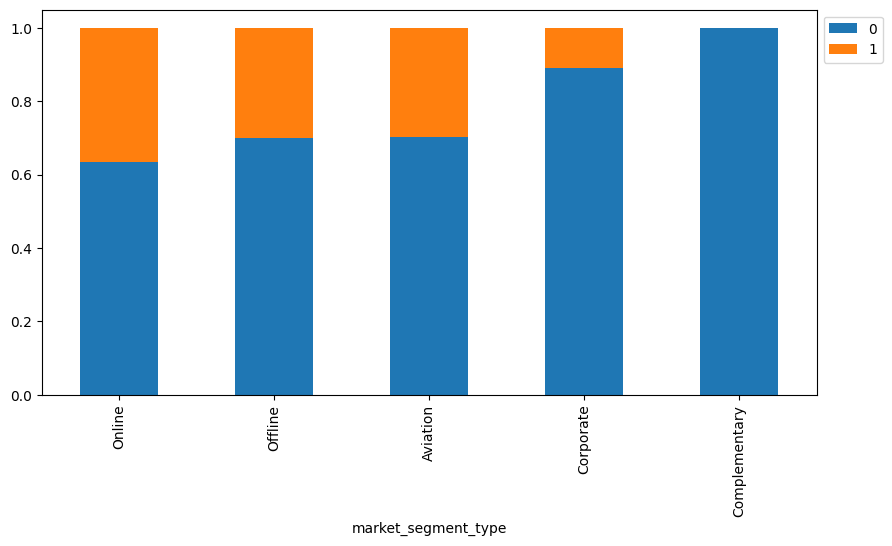

In [ ]:
stacked_barplot(df, "market_segment_type", "booking_status")

**Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations**

no_of_previous_cancellations      0    1   2   3   4   5  6  11  13    All
no_of_special_requests                                                    
2                              4347    4   1   2   1   7  1   1   0   4364
All                           35937  198  46  43  10  11  1  25   4  36275
0                             19553  153  25  28   3   3  0   8   4  19777
1                             11284   39  14  13   6   1  0  16   0  11373
3                               668    1   6   0   0   0  0   0   0    675
4                                77    1   0   0   0   0  0   0   0     78
5                                 8    0   0   0   0   0  0   0   0      8
------------------------------------------------------------------------------------------------------------------------


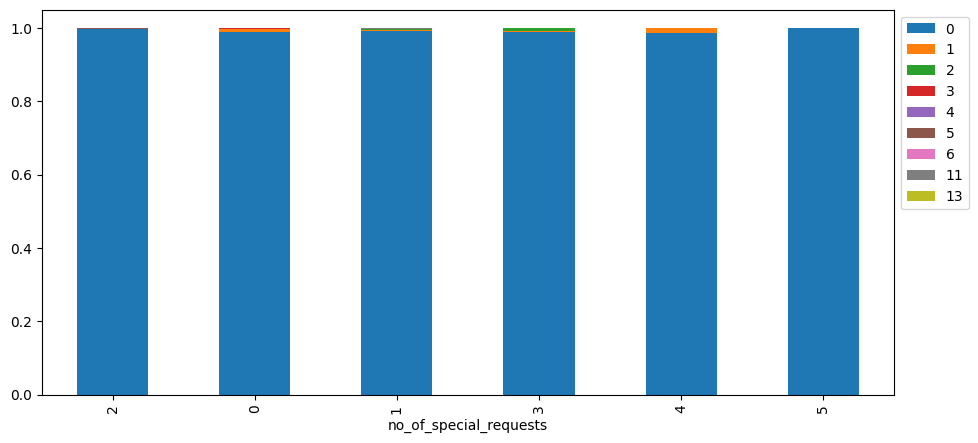

In [ ]:
#plot stacked barplot for no of special requests and booking status
stacked_barplot(df,'no_of_special_requests' ,'no_of_previous_cancellations')

-Guests with 0 special requests has the highest total number of previous cancellations while the least is from guests with 5 special requests.

**Let's see if the special requests made by the customers impacts the prices of a room**

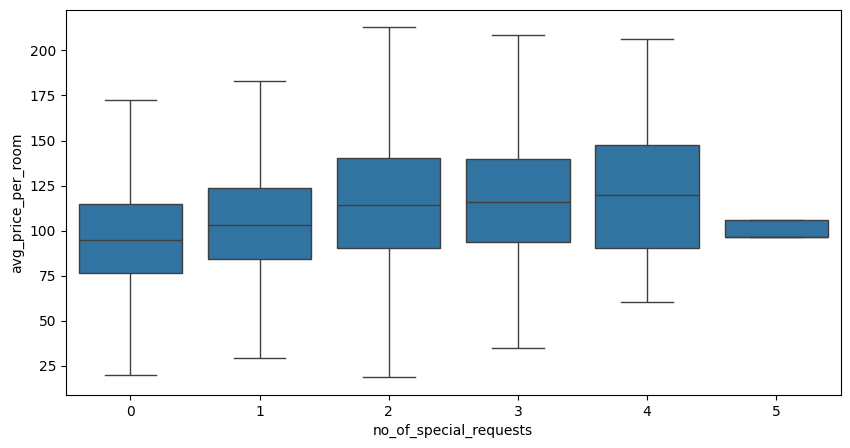

In [ ]:
plt.figure(figsize=(10, 5))
# Create a boxplot with outliers excluded using the 'whis' parameter set to 1.5
sns.boxplot(df, x='no_of_special_requests', y='avg_price_per_room', showfliers=False) ## Complete the code to create boxplot for no of special requests and average price per room (excluding the outliers)
plt.show()

-Guests with 2 special requests pay more on the 'average price per room', and guests with 0 and 2 special requests paid the least

**Analyzing relationship between Booking status and Average price per room**

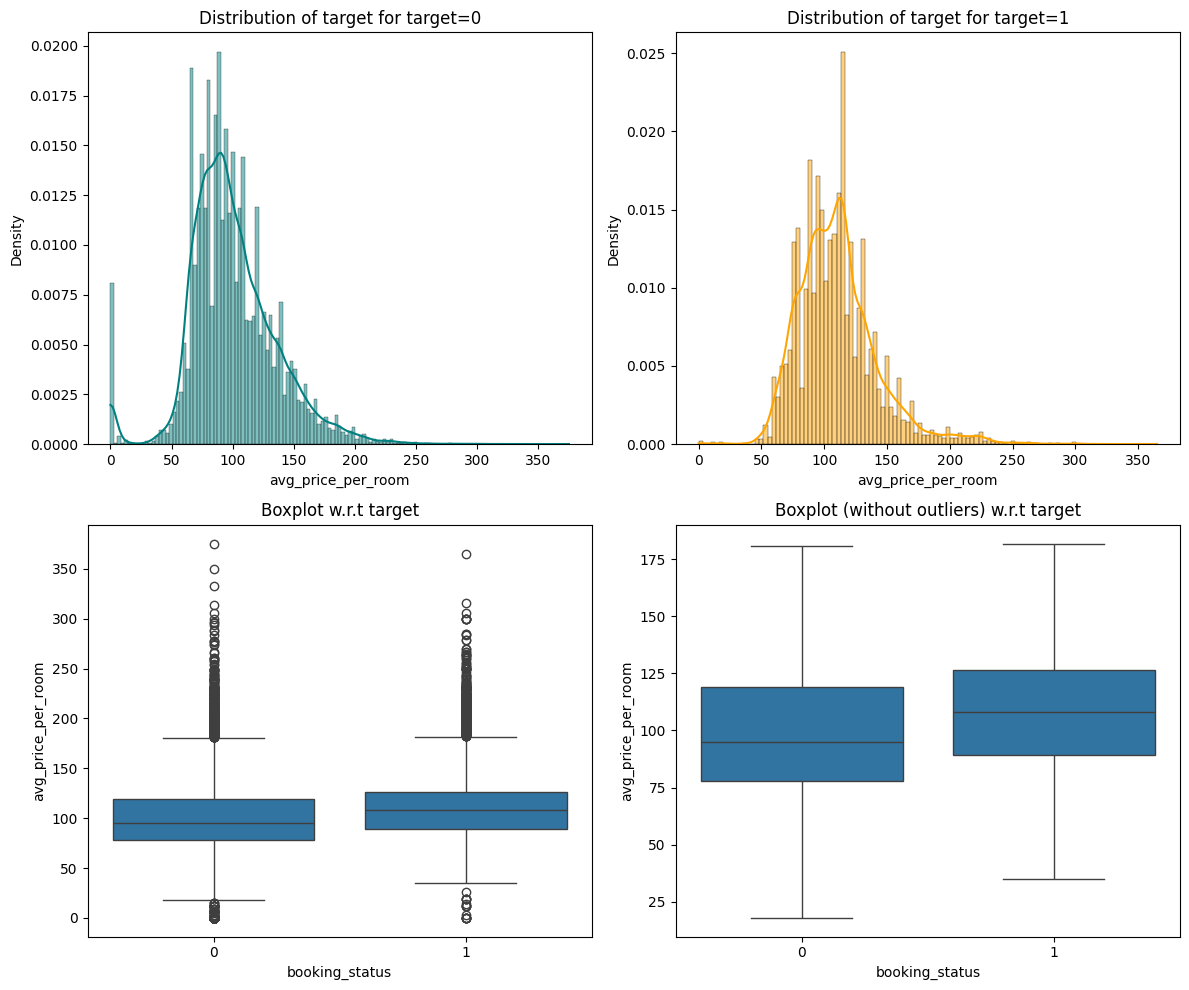

In [ ]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

.The distribution between the booking status and average price per room tends toward normal but not absolutely.

.With outliers, the booking status of 'no previous cancellation' and that of 'previous cancellation' almost have the same average price per room.

. Without outliers, the median-average price per room of 'no previous cancellation' is higher than that of 'previous cancellation', but both seems to have the same maximum average price.

**Analyzing relationship between Booking status and Lead time**

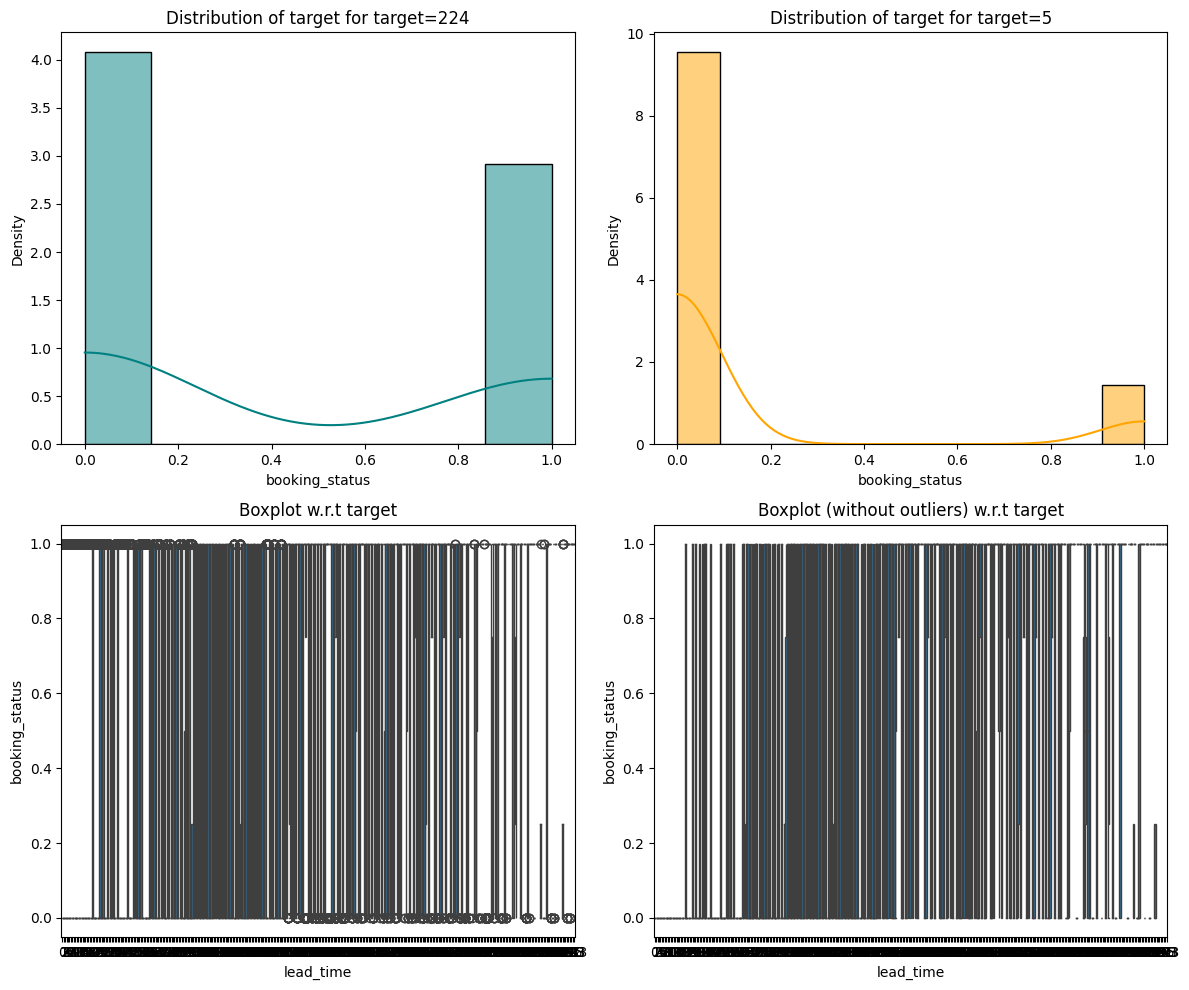

In [ ]:
distribution_plot_wrt_target(df,'booking_status', 'lead_time') ## Complete the code to find distribution of lead time wrt booking status

.With outliers and without outliers, both the lead time and booking status are not influenced by each other.

**Analysis for the customer who stay for at least a day at the hotel.**

In [ ]:
One_day_stay_data = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)]
One_day_stay_data.shape

(17094, 18)

In [ ]:
One_day_stay_data["total_days"] = (
    One_day_stay_data["no_of_week_nights"] + One_day_stay_data["no_of_weekend_nights"]
)

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

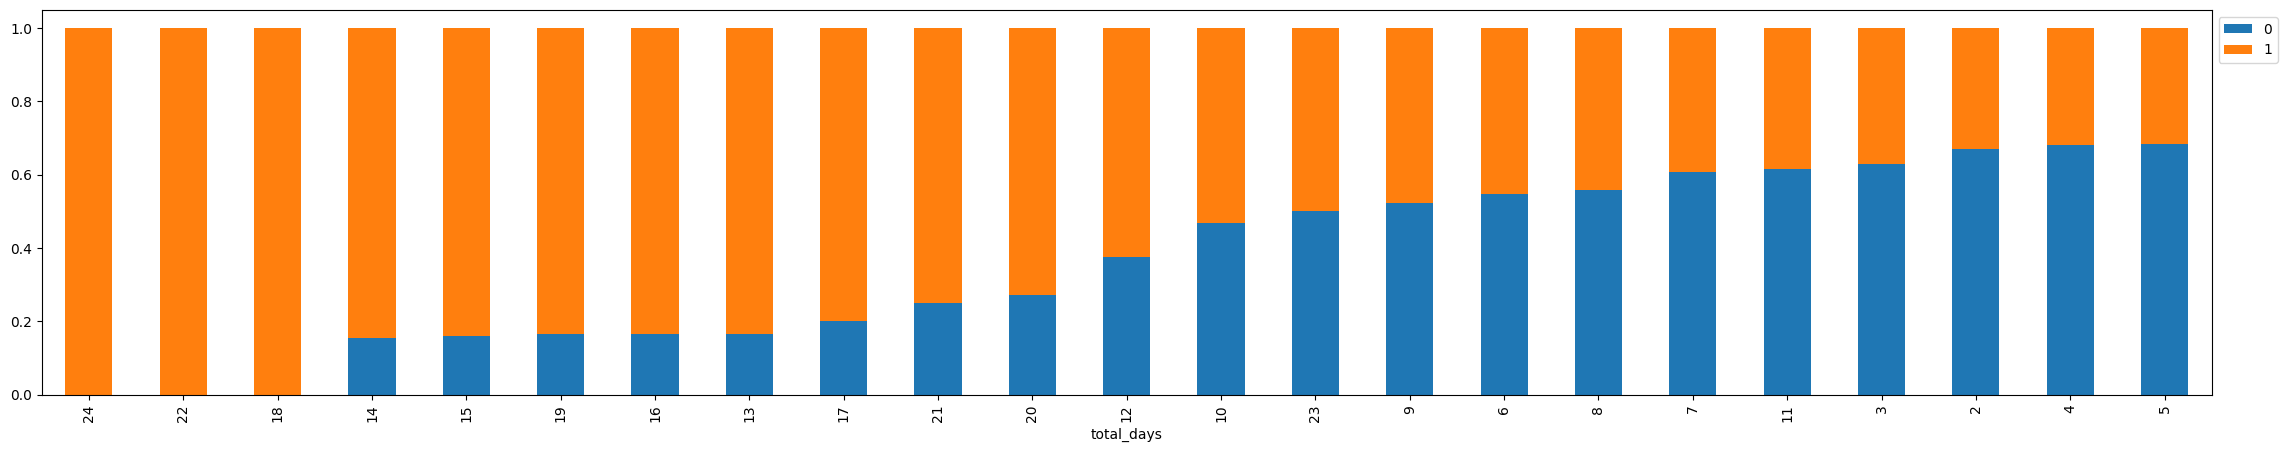

In [ ]:
stacked_barplot(One_day_stay_data, "total_days", 'booking_status')

. Guests who stayed 3 days are more followed by guests who stayed 4 days.

. The number of the guests who stayed 24 days is the least.

**Let's check the percentage of bookings canceled in each month.**

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


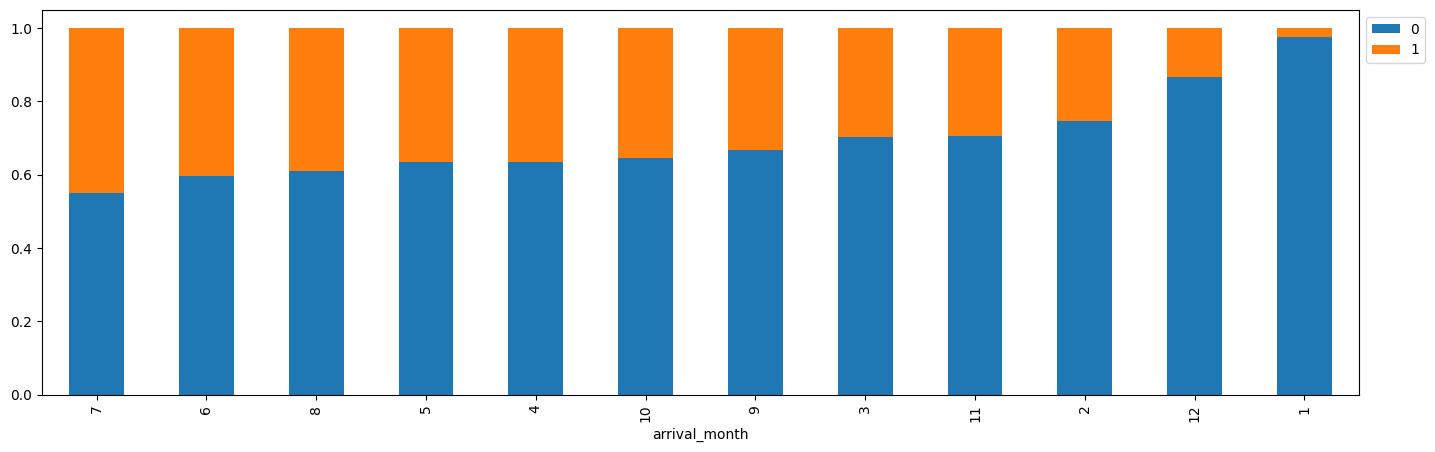

In [ ]:
stacked_barplot(df, 'arrival_month', 'booking_status')

. The tenth month has the highest number of 'previous cancellation' and 'No previous cancellation'.

. The first month has the highest number of 'previous cancellation' and 'No previous cancellation'.

**How prices vary across different months**

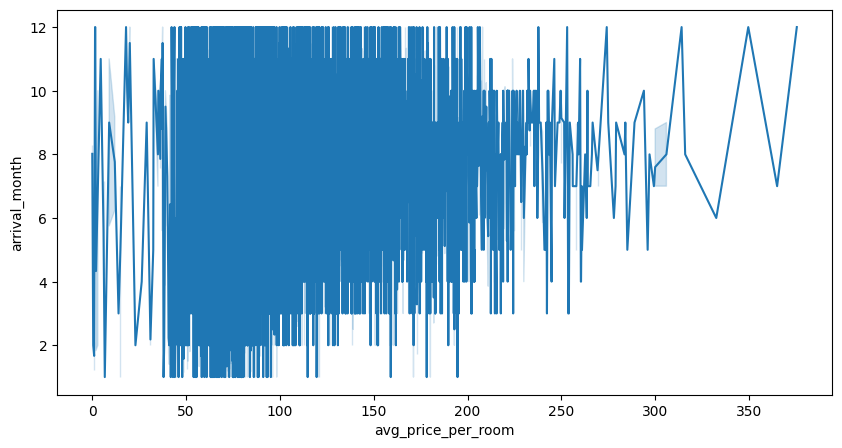

In [ ]:
# create lineplot between average price per room and arrival month
plt.figure(figsize=(10, 5))
sns.lineplot(df, x='avg_price_per_room', y='arrival_month')
plt.show()

. The relationship between arrival month and average price per room  is not linear.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Checking whether treatment of duplicates are necessary**
- Check the number of duplicate rows
- Examine the distribution of the duplicates
- Investigate the impact of removing the duplicates
- Compare the results of your analysis with and without duplicates

In [ ]:
# Check the number of duplicate rows
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)

# Print the number of duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 10275


In [ ]:
# Examine the distribution of the duplicates
duplicate_rows.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count   10275.00000     10275.00000           10275.00000        10275.00000   
mean        1.73100         0.01431               0.62939            2.05849   
std         0.47381         0.13984               0.79862            1.10037   
min         0.00000         0.00000               0.00000            0.00000   
25%         1.00000         0.00000               0.00000            1.00000   
50%         2.00000         0.00000               0.00000            2.00000   
75%         2.00000         0.00000               1.00000            3.00000   
max         3.00000         3.00000               5.00000           15.00000   

       required_car_parking_space   lead_time  arrival_year  arrival_month  \
count                 10275.00000 10275.00000   10275.00000    10275.00000   
mean                      0.00282   132.75299    2017.74491        7.65324   
std                       0.05305   104.92263       0.43593        2.87524   
min                       0.00000     0.00000    2017.00000        1.00000   
25%                       0.00000    41.00000    2017.00000        6.00000   
50%                       0.00000   105.00000    2018.00000        8.00000   
75%                       0.00000   208.00000    2018.00000       10.00000   
max                       1.00000   443.00000    2018.00000       12.00000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count   10275.00000     10275.00000                   10275.00000   
mean       15.20925         0.00759                       0.01022   
std         8.44651         0.08680                       0.23594   
min         1.00000         0.00000                       0.00000   
25%         8.00000         0.00000                       0.00000   
50%        15.00000         0.00000                       0.00000   
75%        22.00000         0.00000                       0.00000   
max        31.00000         1.00000                      13.00000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                           10275.00000         10275.00000   
mean                                0.00234            97.67368   
std                                 0.08710            25.89633   
min                                 0.00000             0.00000   
25%                                 0.00000            80.00000   
50%                                 0.00000            96.30000   
75%                                 0.00000           114.00000   
max                                 6.00000           285.17000   

       no_of_special_requests  booking_status  
count             10275.00000     10275.00000  
mean                  0.31017         0.43241  
std                   0.60628         0.49543  
min                   0.00000         0.00000  
25%                   0.00000         0.00000  
50%                   0.00000         0.00000  
75%                   0.00000         1.00000  
max                   5.00000         1.00000

In [ ]:
# Investigate the impact of removing the duplicates
df_without_duplicates = df.drop_duplicates()

In [ ]:
df_without_duplicates.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count   26000.00000     26000.00000           26000.00000        26000.00000   
mean        1.89000         0.14050               0.88238            2.26192   
std         0.52870         0.45285               0.88737            1.51234   
min         0.00000         0.00000               0.00000            0.00000   
25%         2.00000         0.00000               0.00000            1.00000   
50%         2.00000         0.00000               1.00000            2.00000   
75%         2.00000         0.00000               2.00000            3.00000   
max         4.00000         3.00000               7.00000           17.00000   

       required_car_parking_space   lead_time  arrival_year  arrival_month  \
count                 26000.00000 26000.00000   26000.00000    26000.00000   
mean                      0.04212    66.45285    2017.85027        7.33292   
std                       0.20086    68.60680       0.35681        3.13892   
min                       0.00000     0.00000    2017.00000        1.00000   
25%                       0.00000    12.00000    2018.00000        5.00000   
50%                       0.00000    44.00000    2018.00000        8.00000   
75%                       0.00000   100.00000    2018.00000       10.00000   
max                       1.00000   443.00000    2018.00000       12.00000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count   26000.00000     26000.00000                   26000.00000   
mean       15.75023         0.03277                       0.02854   
std         8.84939         0.17804                       0.40889   
min         1.00000         0.00000                       0.00000   
25%         8.00000         0.00000                       0.00000   
50%        16.00000         0.00000                       0.00000   
75%        23.00000         0.00000                       0.00000   
max        31.00000         1.00000                      13.00000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                           26000.00000         26000.00000   
mean                                0.21312           105.68198   
std                                 2.06824            37.78347   
min                                 0.00000             0.00000   
25%                                 0.00000            80.75000   
50%                                 0.00000           100.00000   
75%                                 0.00000           127.00000   
max                                58.00000           375.50000   

       no_of_special_requests  booking_status  
count             26000.00000     26000.00000  
mean                  0.74196         0.28623  
std                   0.81511         0.45201  
min                   0.00000         0.00000  
25%                   0.00000         0.00000  
50%                   1.00000         0.00000  
75%                   1.00000         1.00000  
max                   5.00000         1.00000

In [ ]:
numeric_columns = df_without_duplicates.select_dtypes(include=['float64', 'int64']).columns

# Compare the means of each numeric column
for column in numeric_columns:
    if column not in duplicate_rows.columns:
        continue  # Skip if column not present in duplicate_rows
    mean_without_duplicates = df_without_duplicates[column].mean()
    mean_with_duplicates = duplicate_rows[column].mean()
    print(f"Mean of {column} without duplicates: {mean_without_duplicates}")
    print(f"Mean of {column} with duplicates: {mean_with_duplicates}")



Mean of no_of_adults without duplicates: 1.89
Mean of no_of_adults with duplicates: 1.7309975669099757
Mean of no_of_children without duplicates: 0.1405
Mean of no_of_children with duplicates: 0.014306569343065694
Mean of no_of_weekend_nights without duplicates: 0.8823846153846154
Mean of no_of_weekend_nights with duplicates: 0.6293917274939173
Mean of no_of_week_nights without duplicates: 2.2619230769230767
Mean of no_of_week_nights with duplicates: 2.058491484184915
Mean of required_car_parking_space without duplicates: 0.04211538461538462
Mean of required_car_parking_space with duplicates: 0.0028223844282238442
Mean of lead_time without duplicates: 66.45284615384615
Mean of lead_time with duplicates: 132.75299270072992
Mean of arrival_year without duplicates: 2017.8502692307693
Mean of arrival_year with duplicates: 2017.744914841849
Mean of arrival_month without duplicates: 7.332923076923077
Mean of arrival_month with duplicates: 7.65323600973236
Mean of arrival_date without duplica

The comparison of the mean of most of the variables with duplicates and without duplicates shows higher disparity.
This may imply that the duplicate rows are not simply redundant measurements, but rather represent distinct
entities with different values for some attributes. Therefore, it is likely that removing the duplicate rows
would bias our analysis. So, **duplicates are not removed.**

**Outliers check and treatment**

**Check outliers**

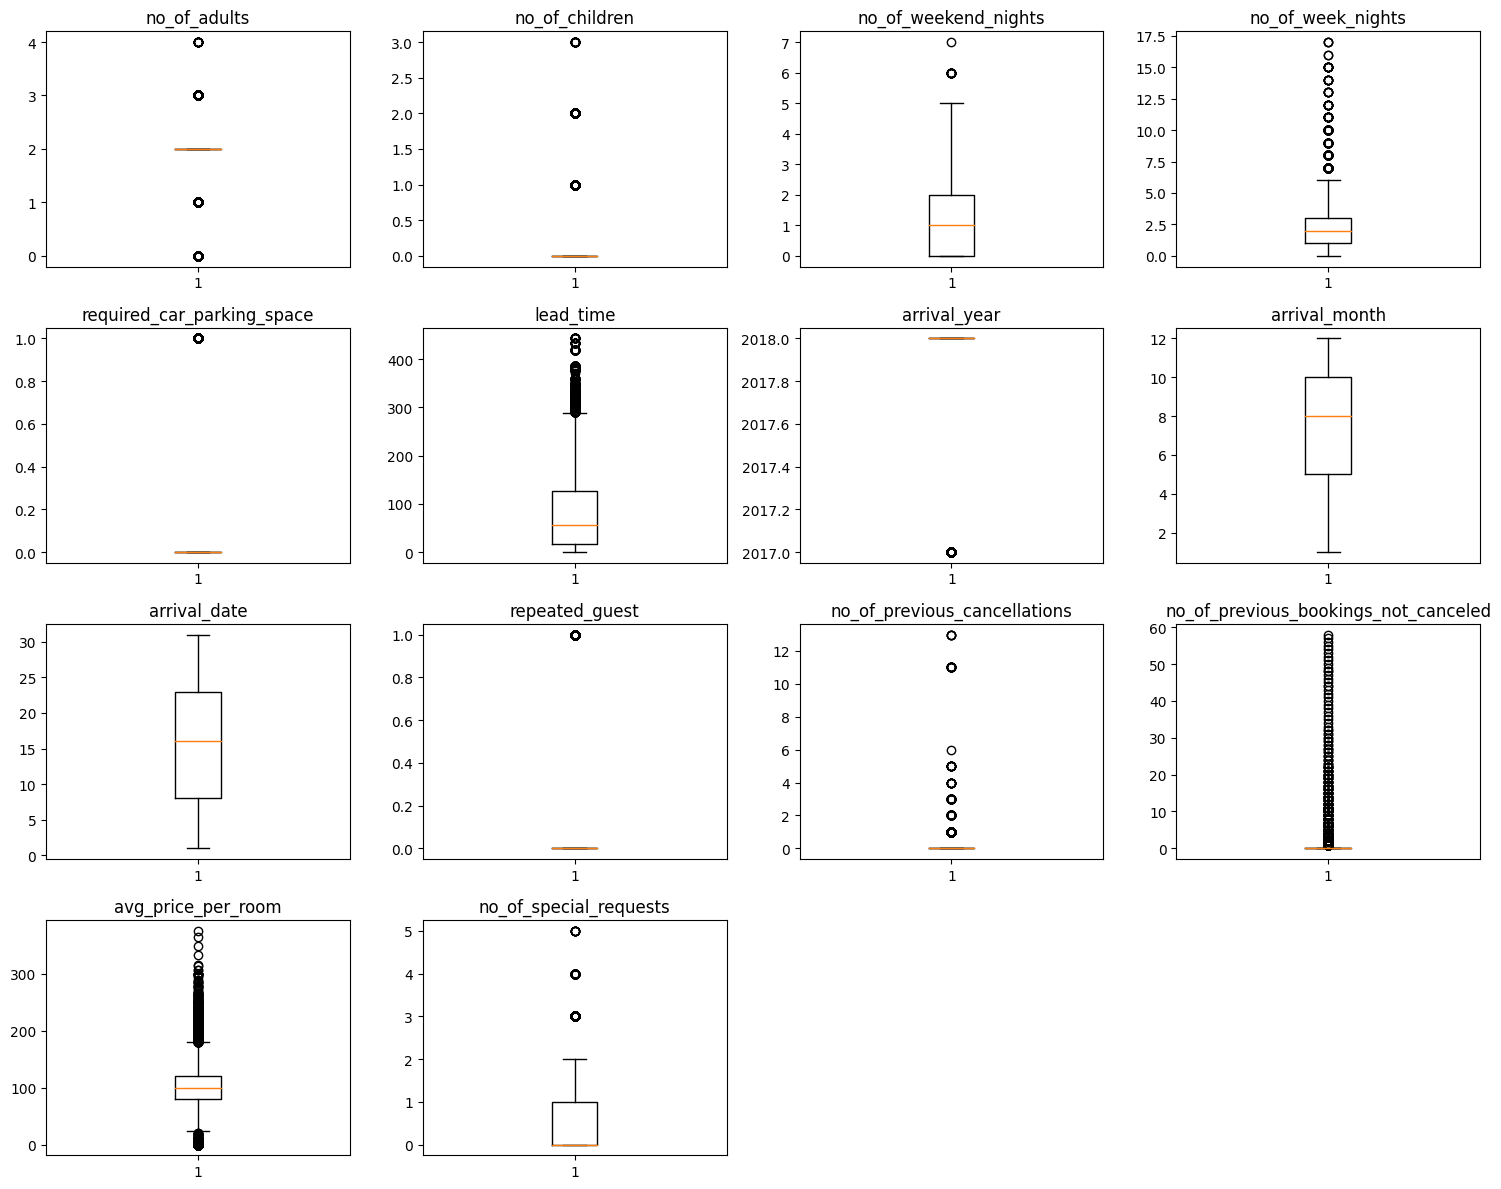

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

#dropping booking status
numeric_columns.remove("booking_status")
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

We shall treat outliers as unique values to most variables.

**Exploratory Data Analysis(EDA) after Data Preprocessing**

It is a good idea to explore the data once again after manipulating it.
    
It is a good idea to explore the data once again after manipulating it.

**Bivariate Analysis**

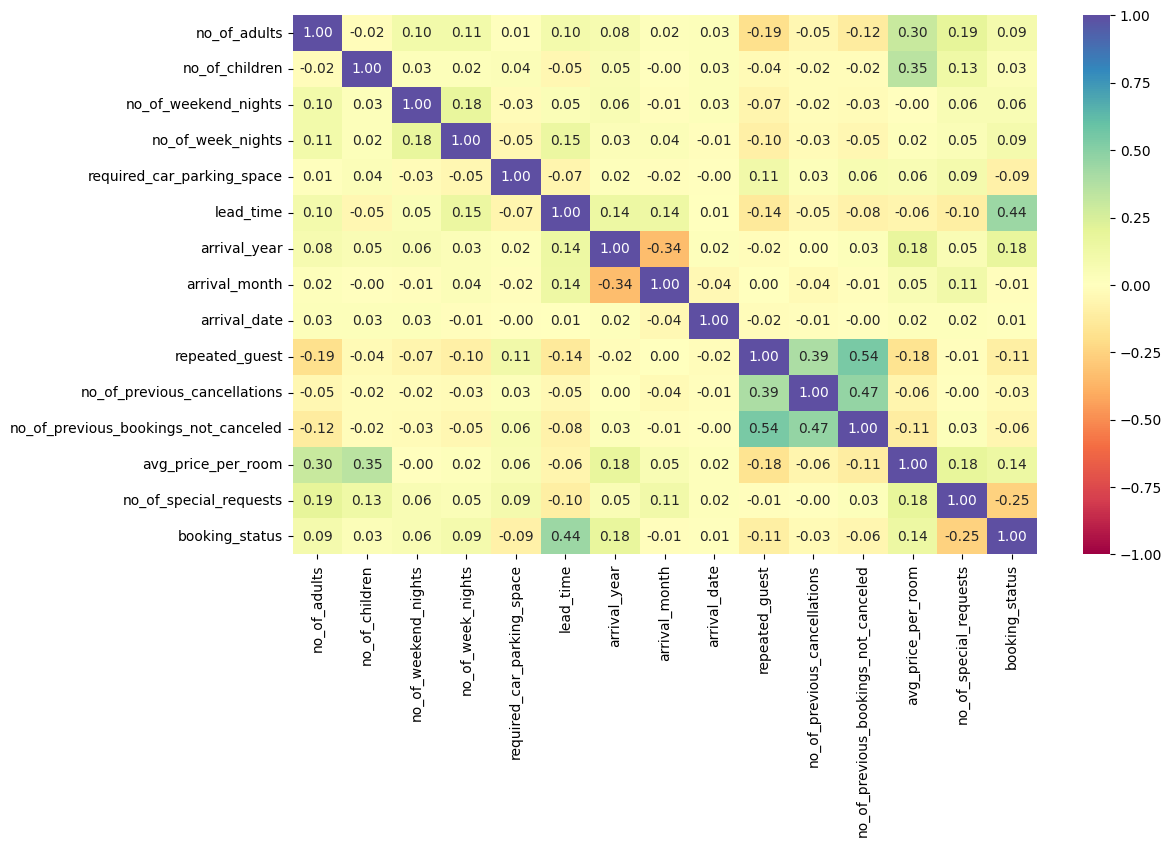

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

.The correlation between booking status and lead time remains the same.

.The correlation between repeated guests and the 'number of previous bookings not canceled' remains the same. remains the same.

.The correlation between repeated guests and the 'number of previous cancellations' remains the same. remains the same.

.The correlation between 'number of previous bookings not canceled' and the 'number of previous cancellations' remains the same.



**Model Building**

Model Evaluation Criterion

- Predicting that a guest will not cancel booking , but in reality will do so.

- Predicting that  a guest will cancel booking , but in reality will do not do so.

**create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Data Preparation for Modeling**

-We want to predict which bookings will be canceled.

-Before we proceed to build a model, we'll have to encode categorical features.

-We'll split the data into train and test to be able to evaluate the model that we build on the train data.


In [ ]:
# separating independent variables from dependent variables
X = df.drop(["booking_status"], axis=1) ## Independent variables
Y = df["booking_status"] ## dependent variable

# adding constant to X
X = add_constant(X)
X =  sm.add_constant(X)

# create dummies for X
X = X = pd.get_dummies(X, drop_first=True)


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.30, random_state=1, stratify=Y
) ## split the data into train test in the ratio 70:30 with random_state = 1

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67238
1   0.32762
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67233
1   0.32767
Name: booking_status, dtype: float64


**Building Logistic Regression Model**

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit() ## fit logistic regression
print(lg.summary()) ## print summary of the model

         Current function value: 0.422404
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 19 Apr 2024   Pseudo R-squ.:                  0.3321
Time:                        02:55:56   Log-Likelihood:                -10726.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -886.9564    121.335     -7.310      0.000   -1124.769

.25392 data points were used to train the logistic regression model.

.25364, which is Df Residuals(degrees of freedom for residuals) indicates the number of observations/data points that were not used in estimating the parameters of the model.

.no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights,lead_time, arrival_year,arrival_date,no_of_previous_cancellations,avg_price_per_room,type_of_meal:Plan 2,Plan 3,and Not Selected, room_type_reserved_room type 3, and market_segment_type_Online are the independent variables that have positive elationship with the target variable. A one unit increase in any of them will increase the target variable by its coefficient.

. An increase of one unit of the other variables with negative coefficients will decrease the target variable by their coefficients.

In [ ]:
# Performance check on X_train1 and y_train
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80679 0.63277    0.73985 0.68213

-The accuracy is 0.80679 or approximately 80.68%, indicating that about 80.68% of the predictions made by the model are correct.

-The recall is 0.63277 or ~ 63.30%, suggesting that the model correctly identified about 63.30% of the actual positive by the model.

-The precision value is 0.73985 or approximately 73.99%, indicating that about 73.99% of the positive predictions made by the mode a.re corret.

-F1 score  is the harmonic mean of precision and recall and provides a single metric to balance between precision and recall
..
The F1 score is 0.68134, representing the balance between precision and recall in the model's performance.

***Test for Multicolinearity**

In [ ]:
# define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

feature            VIF
0                                  const 39624634.31385
1                           no_of_adults        1.34705
2                         no_of_children        2.08820
3                   no_of_weekend_nights        1.06732
4                      no_of_week_nights        1.09435
5             required_car_parking_space        1.03499
6                              lead_time        1.40219
7                           arrival_year        1.43432
8                          arrival_month        1.27809
9                           arrival_date        1.00771
10                        repeated_guest        1.75027
11          no_of_previous_cancellations        1.32201
12  no_of_previous_bookings_not_canceled        1.57089
13                    avg_price_per_room        2.05023
14                no_of_special_requests        1.24765
15         type_of_meal_plan_Meal Plan 2        1.26322
16         type_of_meal_plan_Meal Plan 3        1.00797
17        type_of_meal_plan_Not Selected        1.27995
18        room_type_reserved_Room_Type 2        1.09653
19        room_type_reserved_Room_Type 3        1.00390
20        room_type_reserved_Room_Type 4        1.35779
21        room_type_reserved_Room_Type 5        1.03107
22        room_type_reserved_Room_Type 6        2.04832
23        room_type_reserved_Room_Type 7        1.09399
24     market_segment_type_Complementary        4.35263
25         market_segment_type_Corporate       16.63449
26           market_segment_type_Offline       62.51418
27            market_segment_type_Online       69.47432

.There is no feature with vif>5.

. We ignore the dummy variables vif>5 and that of the constant, they cannot influence our prediction.

**Removing Multicollinearity**

.Drop every column one by one that has a VIF score greater than 5.A VIF above 5 signals high multicollinearity that may distort the interpretation of the coefficients.
.

-Check the VIF scores again.

-Continue till you get all VIF scores under 5.

-Ignore the VIF values of constant, and dummie variables because they can't influence our model for prediction.

**Dropping high p-value variables**

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- Drop the identified variables with p-value>0.05 one after the other.
-Build a model, check the p-values of the variables, and drop the column with the highest p-vaue.
-
Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest pv-
lu..-
Repeat the above two steps till there are no columns with p-value > 0.05.


**Functional code to for dropping of variables with p-value>0.05**

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
# Specify the train and test data with selected features
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:

# create a function for logistic Regression Model
logit1 = sm.Logit(y_train, X_train1) ## function to train logistic regression on X_train1 and y_train
lg1 = logit1.fit() ## function to fit logistic regression
print(lg1.summary()) ## print summary of the model

Optimization terminated successfully.
         Current function value: 0.423028
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Fri, 19 Apr 2024   Pseudo R-squ.:                  0.3312
Time:                        02:56:50   Log-Likelihood:                -10742.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -869.4077    120.911     -7.191    

-After all variables with p-value>0.05 have been dropped:

-The data points used to train the logistic regression model remains the same, but Df Residuals have increased by 8 data points.

-The independent variables with positive coefficient have dropped to no_of_weekend_nights, no_of_week_nights,lead_time, arrival_year,no_of_previous_cancellations,avg_price_per_room,type_of_meal:Plan 2, and Not Selected. A one unit increase in any of them will increase the target variable by its coefficient.

-An increase of one unit of the other variables with negative coefficients will decrease the target variable by their coefficients.

All the variables with p-value>0.05 have been dropped.

In [ ]:
# Performance check on X_train1 and y_train
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80663 0.63265    0.73950 0.68191

.The accuracy is 0.80663 or approximately 80.66%, indicating that around 80.66% of the predictions made by the model on the training data are correct.

.The recall value is 0.63265 or ~63.27%, indicating that the model correctly identified about 63.27% of the actual positive cases in the training data.

.The precision value is 0.73950 or approximately 73.95%, indicating that about 73.95% of the positive predictions made by the model on the training data are correct.

.The F1 score is 0.68191, representing the balance between precision and recall in the model's performance on the training data.



**Comparing the two sets of performance metrics before and after removing variables with p-values greater than 0.05:**

-The difference between the performance metrics before and after removing variables with p-values greater than 0.05 is minimal.

-The model's accuracy, recall, precision, and F1 score remain consistent after the variable selection process.

-The accuracy of both models is around 80.68% to 80.69%, indicating that a similar proportion of predictions are correct in both cases.

-The recall values are also quite close, around 63305% to 63.01%, indicating that both models identify a similar proportion of positive cases.
-
The precision values are also similar at approximately 73995% to 73599%, indicating that both models have a comparable proportion of correct positive preictions.
s
The F1 scores are also closely matched, representing a balance between precision and recall in bomodels. l-We can summarize thatry, the removal of variables with p-values greater than 0.05 did not significantly impact the model's performance based on the training data. The models exhibit similar predictive abilities before and after the variable selection process.


**Converting coefficients to odds**

.
The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
Therefore, odds = exp(.
b.)
The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

const  no_of_weekend_nights  no_of_week_nights  \
Odds           0.00000               1.16153            1.03682   
Change_odd% -100.00000              16.15325            3.68173   

             required_car_parking_space  lead_time  arrival_year  \
Odds                            0.19886    1.01601       1.53653   
Change_odd%                   -80.11371    1.60134      53.65324   

             arrival_month  repeated_guest  no_of_previous_cancellations  \
Odds               0.95191         0.04623                       1.33523   
Change_odd%       -4.80895       -95.37690                      33.52334   

             avg_price_per_room  no_of_special_requests  \
Odds                    1.01925                 0.22638   
Change_odd%             1.92531               -77.36171   

             type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
Odds                               1.18026                         1.23366   
Change_odd%                       18.02564                        23.36580   

             room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
Odds                                0.68845                         0.76451   
Change_odd%                       -31.15506                       -23.54886   

             room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds                                0.50213                         0.47521   
Change_odd%                       -49.78672                       -52.47870   

             room_type_reserved_Room_Type 7  market_segment_type_Corporate  \
Odds                                0.26776                        0.41854   
Change_odd%                       -73.22410                      -58.14571   

             market_segment_type_Offline  
Odds                             0.17012  
Change_odd%                    -82.98809

**Odds:**

-The odds ratio represents the change in odds of the target variable (dependent variable) for a one-unit change in the respective independent variable.

-Variables with odds greater than 1 have a positive impact on the odds of the target variable, meaning as they increase, the odds of the outcome increase.

-Variables with odds less than 1 have a negative impact on the odds of the target variable, meaning as they increase, the odds of the outcome decrease.

-A one-unit increase in 'no_of_weekend_nights' increases the odds by approximately 1.16153, etc.

**Change in Odd(%):**

-The percentage change in odds represents how much the odds of the target variable change for a one-unit change in the respective independent variable.

-Negative values indicate a decrease in odds, while positive values indicate an increase in odds.

**Checking model performance on the training set¶**

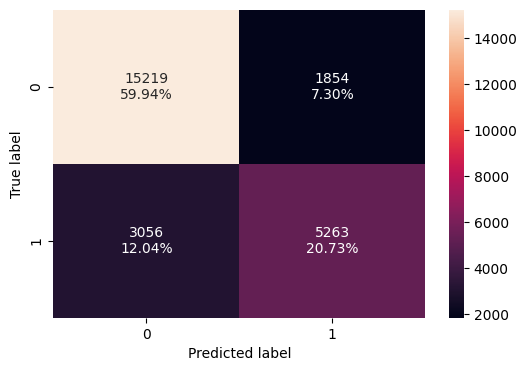

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)


True Negatives (TN): 1521

9True PositivesT(FP)526
3
False Negatives (FN): 305
6
False Positives (FP): 185
45-The model's performance is better for true label 0 (class 0) compared to true label 1 (class 1) based on the provided metrics
.
The model's ability to correctly classify instances with true label 0 is higher in terms of both absolute numbers and percentage compared to true label 19

In [ ]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train) ## Complete the code to check performance on X_train1 and y_train
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80663 0.63265    0.73950 0.68191

**ROC-AUC
ROC-AUC on training set**

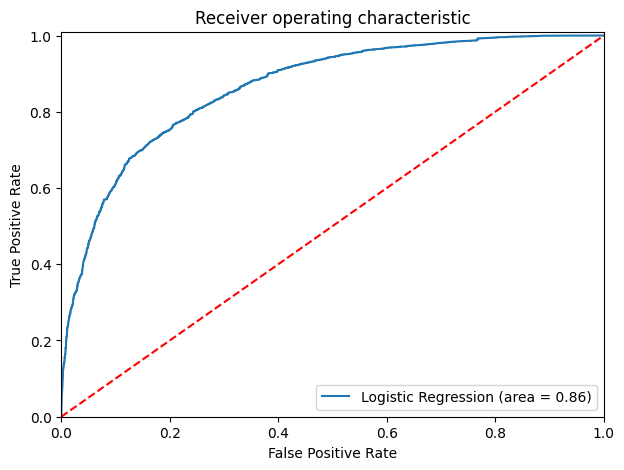

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

.An AUC of 0.86 in the ROC curve for the logistic regression model signifies a strong model performance in terms of classification accuracy and predictive power on the training data.

**Model Performance Improvement**

We want to improve the recall score by changing the model threshold using AUC-ROC Curve.

**Optimal threshold using AUC-ROC curve**

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.33300753336834654


-The optimal threshold is determined by maximizing the True Positive Rate (TPR) and minimizing the False Positive Rate (FPR) as per the AUC-ROC curve criterion.

-The threshold value~0.3331911 is considered the optimal point where the model's ability to correctly classify true positives while minimizing false positives is maximized

-This threshold is used to determine the cutoff point for classifying observations into different classes based on the predicted probabilities from the logistic regression model.

-
By setting the classification threshold to this optimal value, the model aims to balance between correctly identifying positive cases and minimizing false alarms.

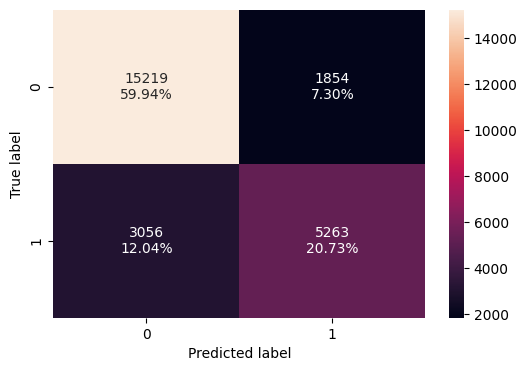

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train,
) ##  create the confusion matrix for X_train1 and y_train with optimal_threshold_auc_roc as threshold

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.78430 0.76608    0.64348 0.69945

**We shall use Precision-Recall curve and see if we can find a better threshold**

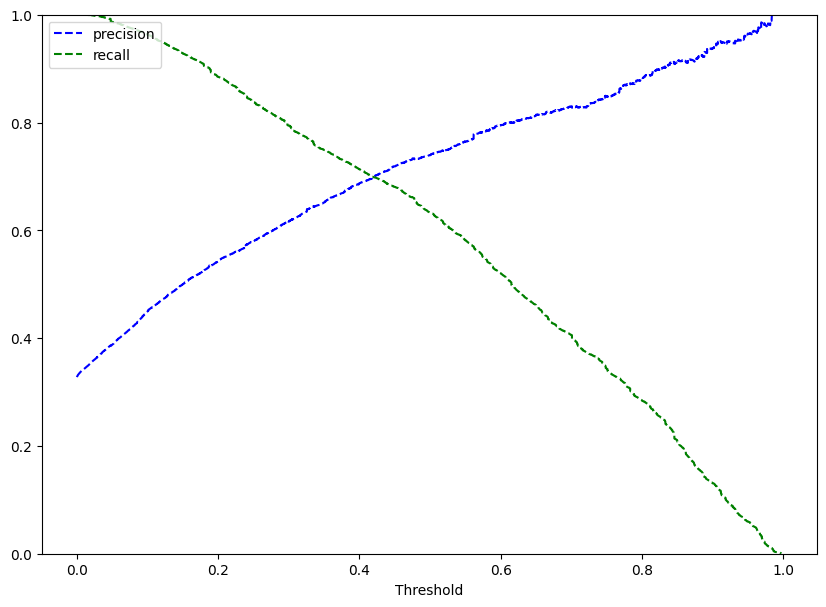

In [ ]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

-Adjusting the classification threshold based on the AUC can lead to a trade-off between accuracy and precision.

-A lower threshold may improve recall but lower precision, while a higher threshold may enhance precision but decrease recall.


In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

**Checking model performance on training set**

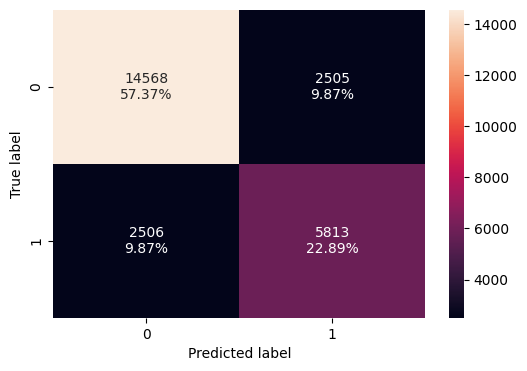

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, optimal_threshold_curve) ## create the confusion matrix for X_train1 and y_train with optimal_threshold_curve as threshold

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.80265 0.69876    0.69885 0.69880

-Accuracy improved slightly from 0.78434 to 0.80265 when the threshold was changed from 0.332952 to 0.42. This has led to a minor increase in accuracy and precision while witnessing a decrease in recall.

-Recall decreased from 0.76608 to 0.698676 when the threshold was adjusted to 0.42.

-Precision showed a slight improvement from 0.64348 to 0.69885 with the change in threshold.

- F1 Score decreased from 0.69958 to 0.69807 after changing the threshold to 0.42, which indicates a slightly lower balance between precision and recall.

**check the performance on the test set**

**Using model with default threshold**

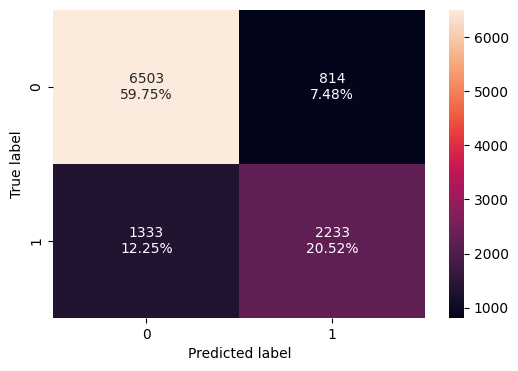

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test) ##  create confusion matrix for X_test1 and y_test

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test) ## Complete the code to check performance on X_test1 and y_test

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80272 0.62619    0.73285 0.67534

**ROC curve on test set**

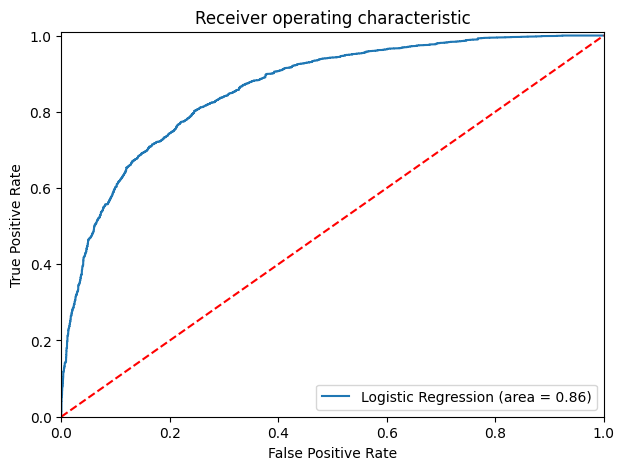

In [ ]:
ogit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

-ROC curve area of 0.86 for both the training and test sets indicates that the logistic regression model is performing well, with high discriminatory power and predictive ability. This metric underscores the model's capacity to make accurate predictions and its effectiveness in class separation.

**Using model with threshold=0.37**

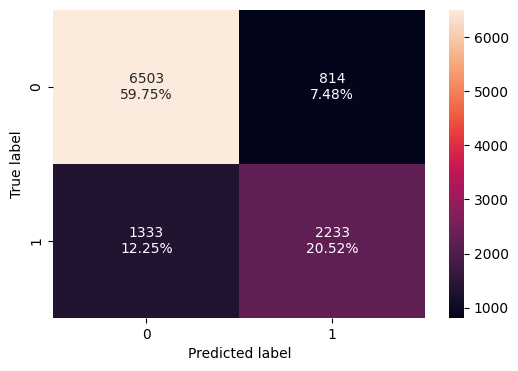

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test) ##  create confusion matrix for X_test1 and y_test using optimal_threshold_auc_roc as threshold

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.77846 0.76612    0.63402 0.69384

**Using model with threshold = 0.42**

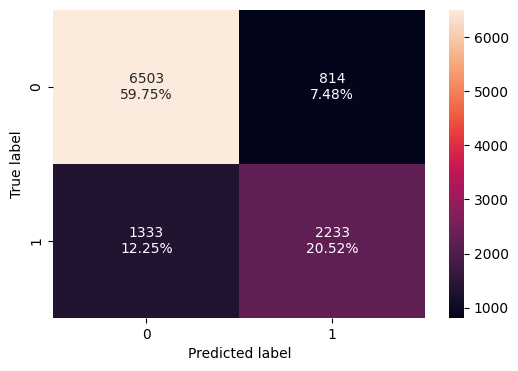

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test) ## create confusion matrix for X_test1 and y_test using optimal_threshold_curve as threshold

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.79656 0.69405    0.68788 0.69095

**Model performance summary**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80663   
Recall                                   0.63265   
Precision                                0.73950   
F1                                       0.68191   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.78430   
Recall                                0.76608   
Precision                             0.64348   
F1                                    0.69945   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80265  
Recall                                0.69876  
Precision                             0.69885  
F1                                    0.69880

-The model with the default threshold (0.5) has an F1 score of 0.68191, reflecting a trade-off between precision and recall.
-
Threshold 0.37 shows higher F1 score of 0.69945 with improved recall but slightly lower precision compared to the default thresho
.
d
Threshold 0.42 has an F1 score of 0.69880, balancing precision and recall similarly to the default threshold

-Choosing a threshold involves a trade-off between precision and recall. Lowering the threshold may increase recall but decrease precision, while raising the threshold may boost precision at the expense of reca, accuracy, y and F1 score.


In [ ]:
# test performance comparison
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df


Test performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80272   
Recall                                   0.62619   
Precision                                0.73285   
F1                                       0.67534   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.77846   
Recall                                0.76612   
Precision                             0.63402   
F1                                    0.69384   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.79656  
Recall                                0.69405  
Precision                             0.68788  
F1                                    0.69095

-The model with the default threshold (Threshold 0.5) has the highest accuracy but lower recall compared to the other thresholds.

-Threshold 0.37 shows an increase in recall and F1 score, with a slight decrease in precision compared to the default threshold.

-
Threshold 0.42 demonstrates lower recall but relatively higher precision compared to the default threshold.
hts:

**Decision Tree**

**Data Preparation for modeling (Decision Tree)**

We want to predict which bookings will be canceled.

Before we proceed to build a model, we'll have to encode categorical features.

We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

X = pd.get_dummies(X) ## create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) ##  split the data into train test in the ratio 70:30 with random_state = 1

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 30)
Shape of test set :  (10883, 30)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


There are 25,392 data points in the training set used to train the decision model, and 10,883 data points in the test set are used to evaluate the model's performance and make predictions.

**First, we shall create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

The model_performance_classification_sklearn function will be used to check the model performance of models
.
The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Building Decision Tree Model**

In [ ]:
# Fit the DecisionTreeClassifier model on the training data
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Checking model performance on training set**

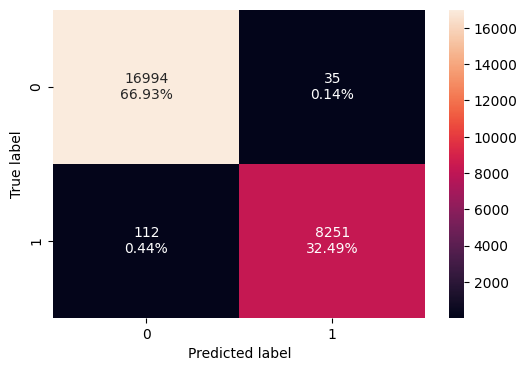

In [ ]:
#Complete the code to create confusion matrix for train data
confusion_matrix_sklearn(model, X_train, y_train) ## create confusion matrix for train data

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

**Checking model performance on test set**

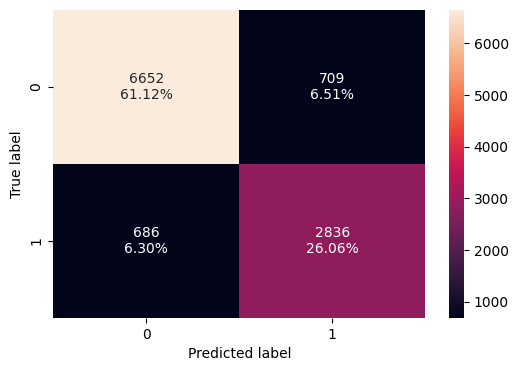

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test) ## create confusion matrix for test data

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## check performance on test set
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.87182 0.80522    0.80000 0.80260

Comparing Train set and Test set for Decision Tree Modeling:

-The comparison highlights a significant drop in model performance when transitioning from the training set to the testing set.

-This disparity suggests potential overfitting on the training data, leading to a decrease in generalization capability when applied to new, unseen data.

-There is a need to address overfitting issues and improve the model's ability to generalize to ensure better performance on unseen data.ance on the test set.


**Before pruning the tree let's check the important features.**

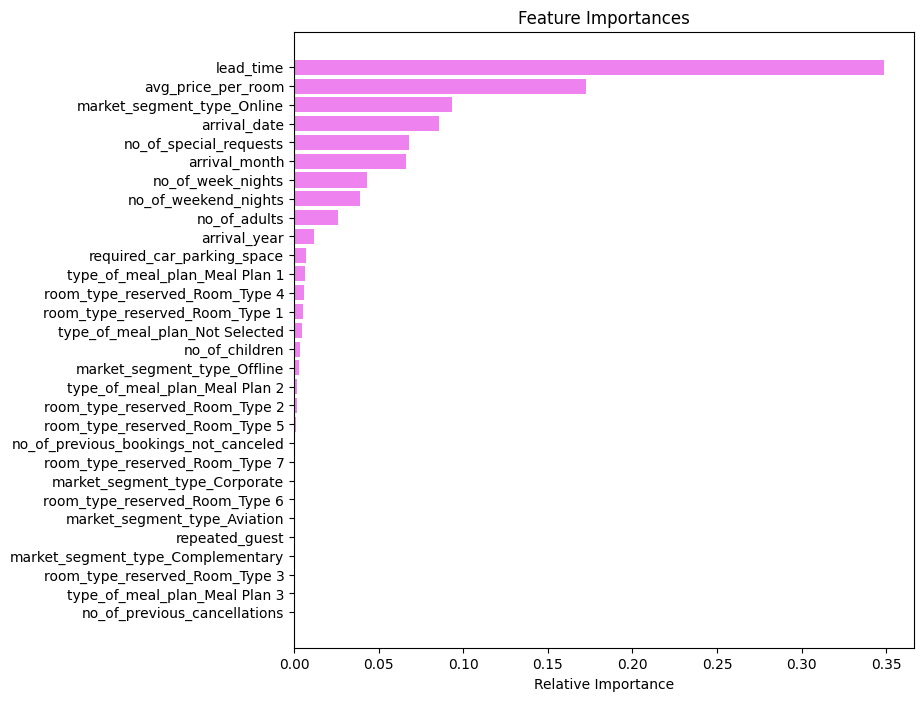

In [ ]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Pre-Pruning:

- lead_time is the most important feature, follow by avg_price_per_room, market_segment_type_Online, arrival_date, no_of_special_requests,arrival_month,no_of_week_nights, no_weekend_nights, no_adults, arrival_year,required_car_parking_space, room_type_reserved_Room_Type 4, room_type_reserved_Room_Type 1, type_of_meal_plan_Not Selected,no_of_children, type_of_Meal Plan 2,room_type_reserved_Room_Type 2, market_segment_type_Offline, and room_type_reserved_Room_Type 5 are factors that determine cancellation of booking or not in descending order of importance.
  
- Other features from room_type_reserved_Room_Type 6 downward are not important for consideration.

**Pruning the tree**

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=75,
                       min_samples_split=10, random_state=1)

**Checking performance on training set¶**

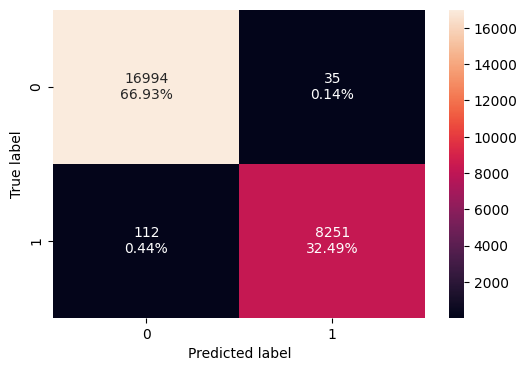

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train) ## create confusion matrix for train data

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(model, X_train, y_train) ## check performance on train set
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

**Checking performance on test set¶**

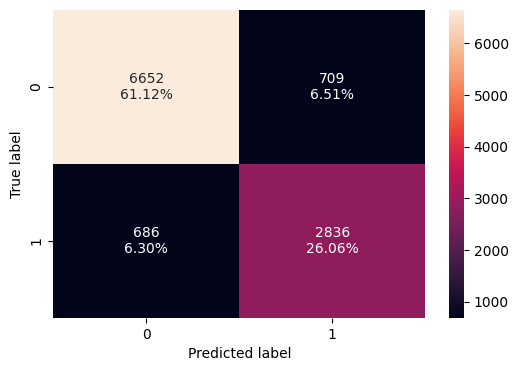

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test) ## create confusion matrix for test data

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## Complete the code to check performance on test set
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.87182 0.80522    0.80000 0.80260

ets.


**Visualizing the Decision Tree**

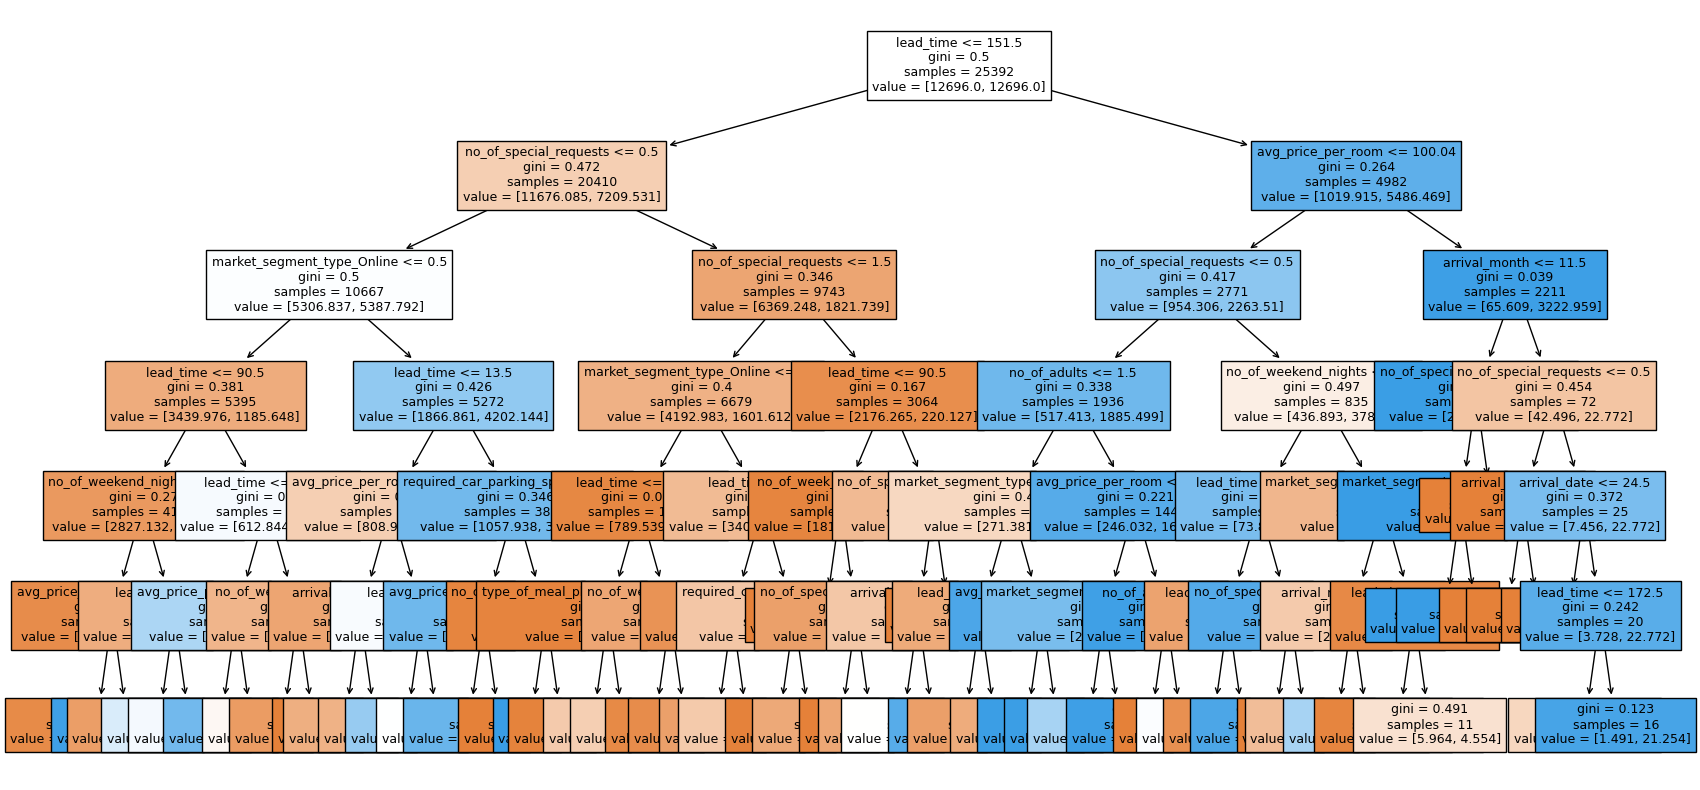

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

-The leaf nodes in the decision tree provide the final prediction or outcome (class 0 for not cancelled, class 1 for cancelled).

-If the lead_time is less than or equal to 151.50, and the no_of_special_requests is less than or equal to 0.50, and the market_segment_type_Online is less than or equal to 0.50, and the lead_time is less than or equal to 90.50, and the no_of_weekend_nights is less than or equal to 0.50, and the avg_price_per_room is less than or equal to 196.50, then the booking will not be canceled.

-If avg_price_per_room is greater than 196.50, the booking will be canceled,etc.


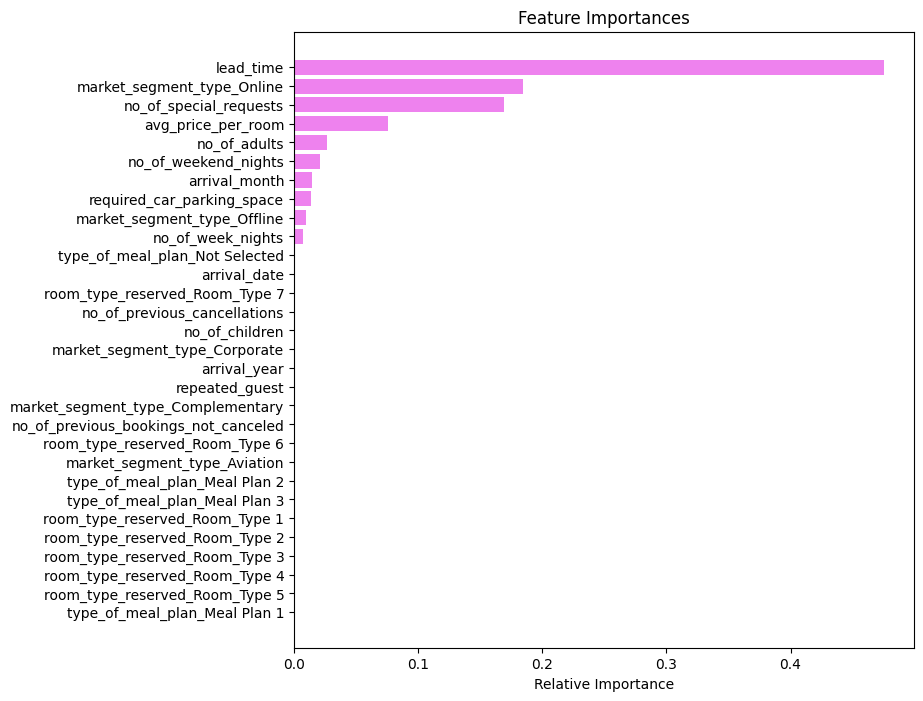

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Post-pruning:

-lead_time is the most important feature, followed by market_segment_type_Online, no_of_special_requests,avg_price_per_room, no_adults,  no_weekend_nights,arrival_month,required_car_parking_space, market_segment_type_Online, and no_of_week_nights, are factors that determine cancelallation of booking in descending order of importance.

-There are changes in the level of feature importance after prunning.

-market_segment_type_Online has overtaking avg_price_per_room and no_of_special_requests is now at the third level, and so on.

-arrival_date,arrival_year,and type_of_meal_plan_Meal: Plan 2,Plan 1, and Not Selected , no_of_children, room_type_reserved_Room_Type 4 and Type 1 have all gone to zeros, which shows the shortcoming of pre prunning.

**Cost Complexity Pruning**

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1839     0.00890     0.32806
1840     0.00980     0.33786
1841     0.01272     0.35058
1842     0.03412     0.41882
1843     0.08118     0.50000

[1844 rows x 2 columns]

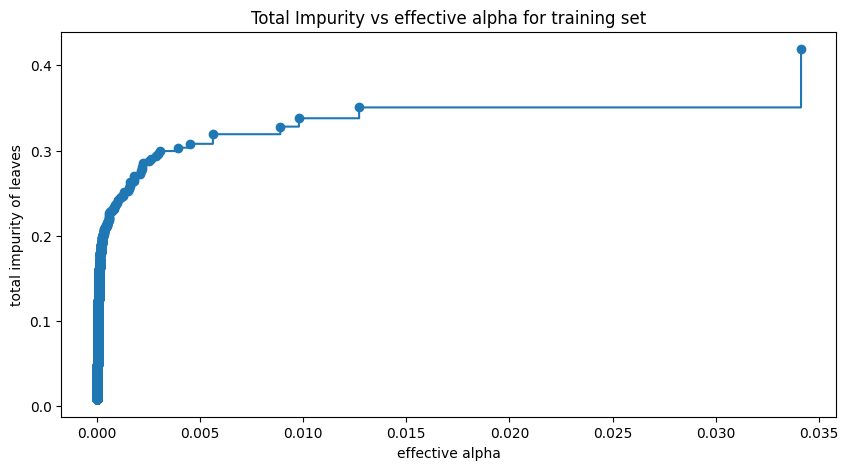

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

-As alpha increases, the total impurity of leaves decreases, and total complexity decreases.

Next, we train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.



In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train,y_train) ## fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389137149


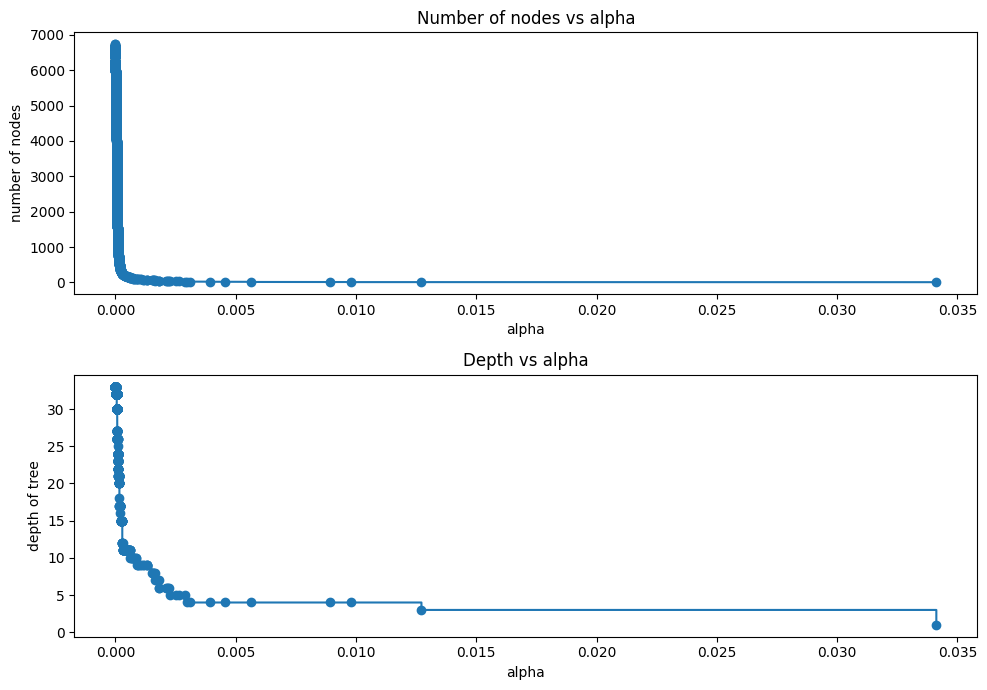

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

From the plots:

-As the alpha increases, the number of nodes decreases to reduce overfitting.

-As alpha increases, the depth of the decision tree is reduced which help prevent overfitting and improve the model's generalization ability.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_test,y_test) ## fit decision tree on testing data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 7 with ccp_alpha: 0.03412090438134102


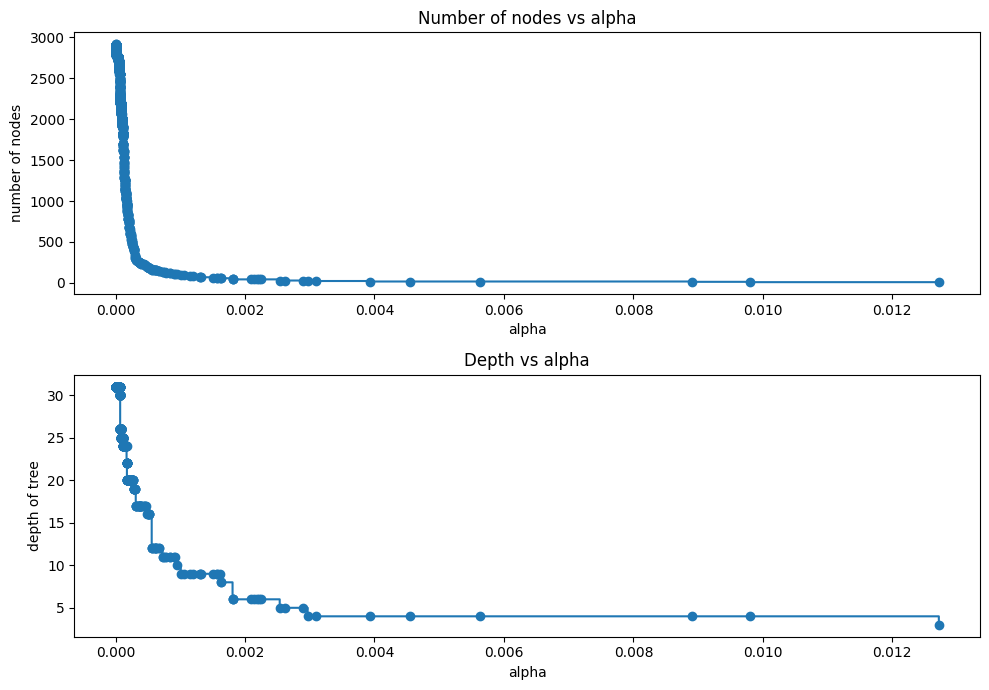

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

-From the plots:

-As the alpha increases, the number of nodes decreases to reduce overfitting.

-As alpha increases, the depth of the decision tree is reduced which help prevent overfitting and improve the model's generalization ability.

**F1 Score vs alpha for training and testing sets**

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

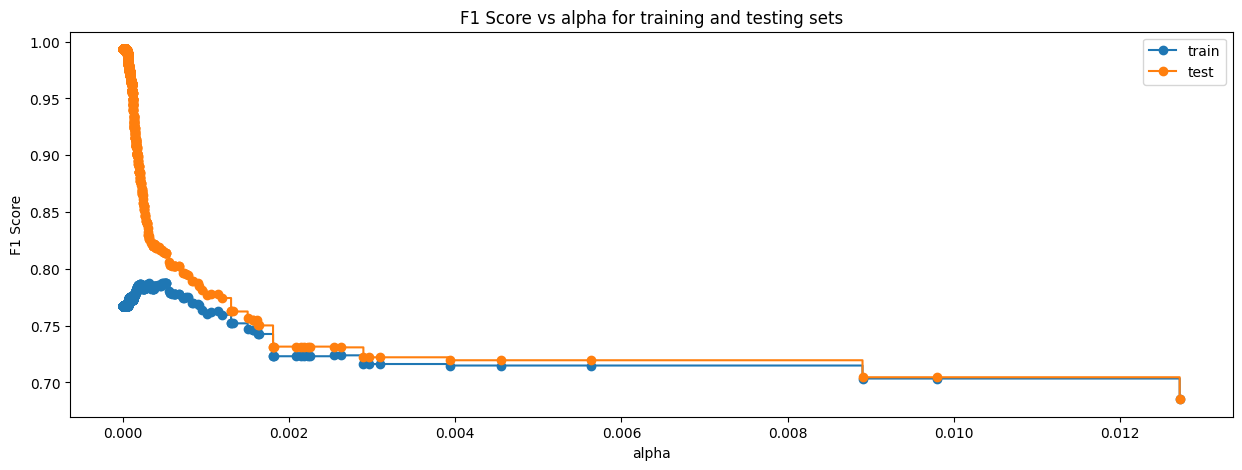

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=2.8537279759349284e-05,
                       class_weight='balanced', random_state=1)


The decision model is optimum at ccp_alpha = ~0.00003

**Checking performance on training set**

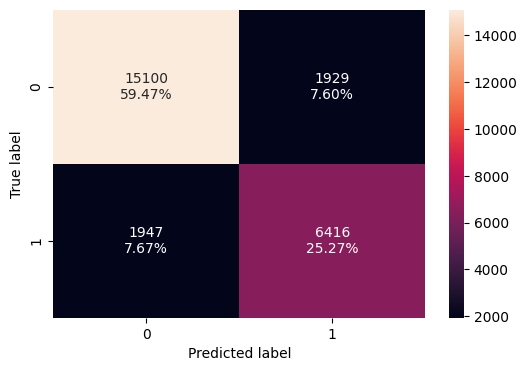

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.84735 0.76719    0.76884 0.76802

**Checking performance on test set**

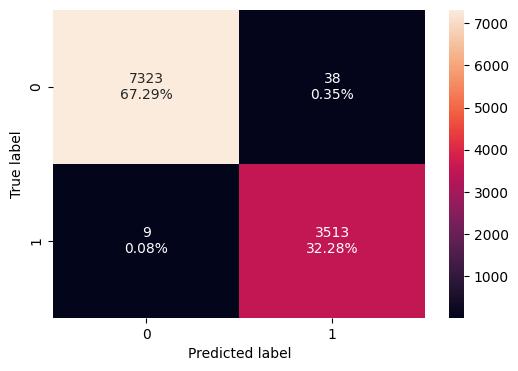

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test) ## create confusion matrix for test data on best model

In [ ]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
) ## check performance of test set on best model
decision_tree_post_perf_test

Accuracy  Recall  Precision      F1
0   0.99568 0.99744    0.98930 0.99336

Post-Cost Complexity Pruning observations:

-Training Set: Before cost complexity pruning, the model exhibited moderate performance with accuracy, recall, precision, and F1 score around 0.75 - 0.80 range.

-Testing Set: After cost complexity pruning, there is a significant improvement in performance, especially in terms of accuracy, recall, precision, and F1 score, with values soaring above 0.99.

-
Cost complexity pruning has effectively enhanced the model's generalization capabilities, leading to superior performance on unseen data.two sets.


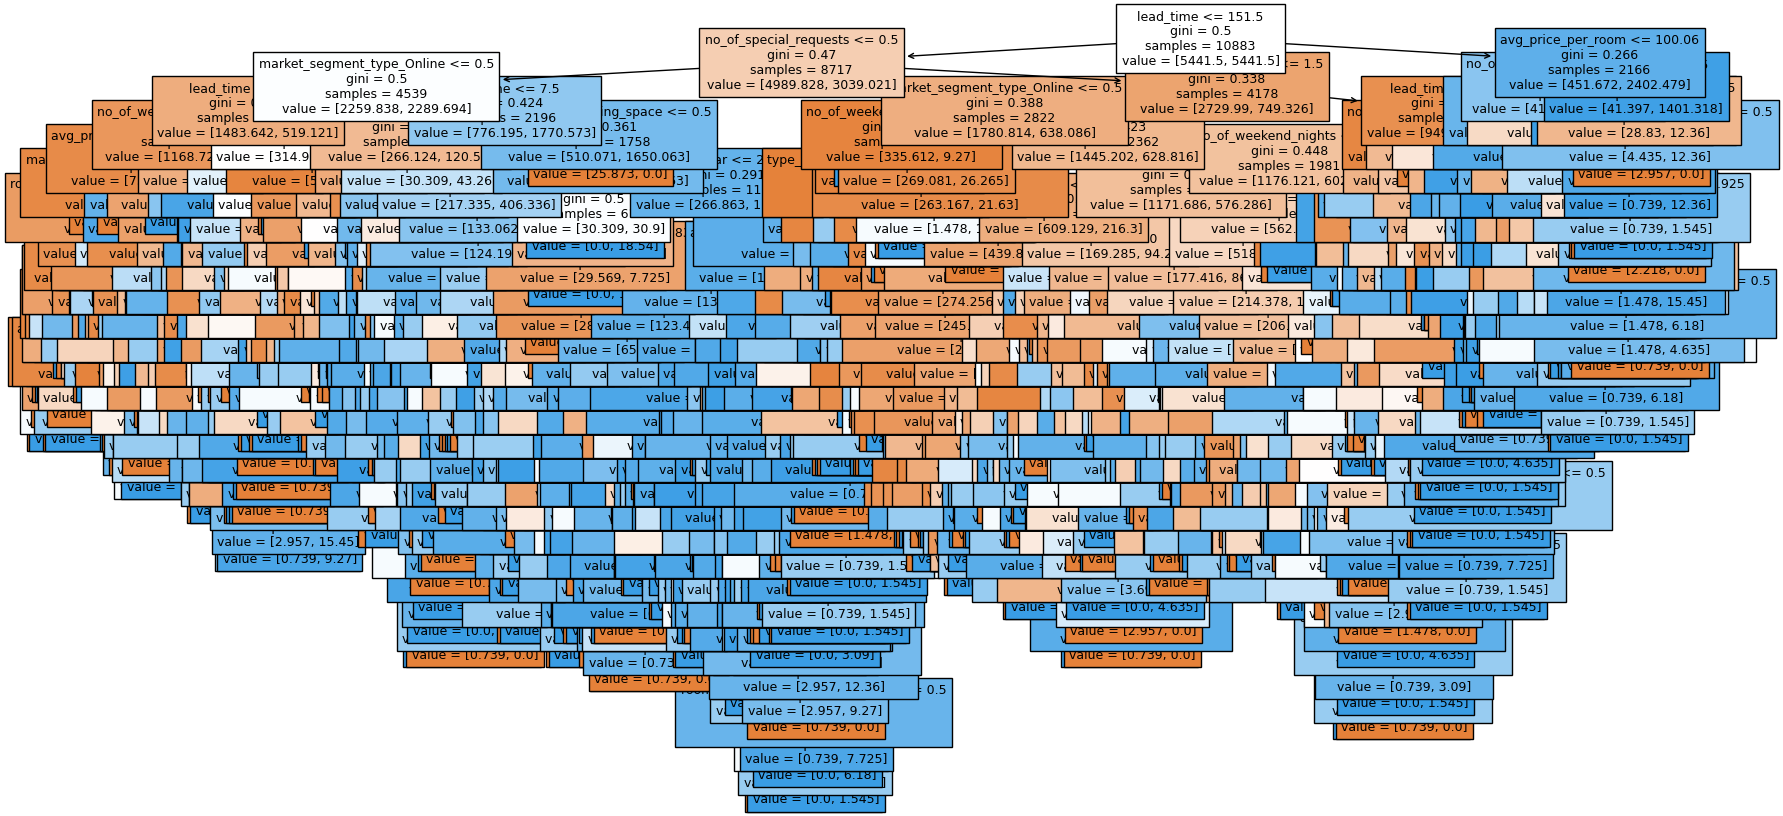

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 74.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 164.93
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |--- no_of_week_nights <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 7.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  7.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- no_of_week_nights >  2.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 62.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch o

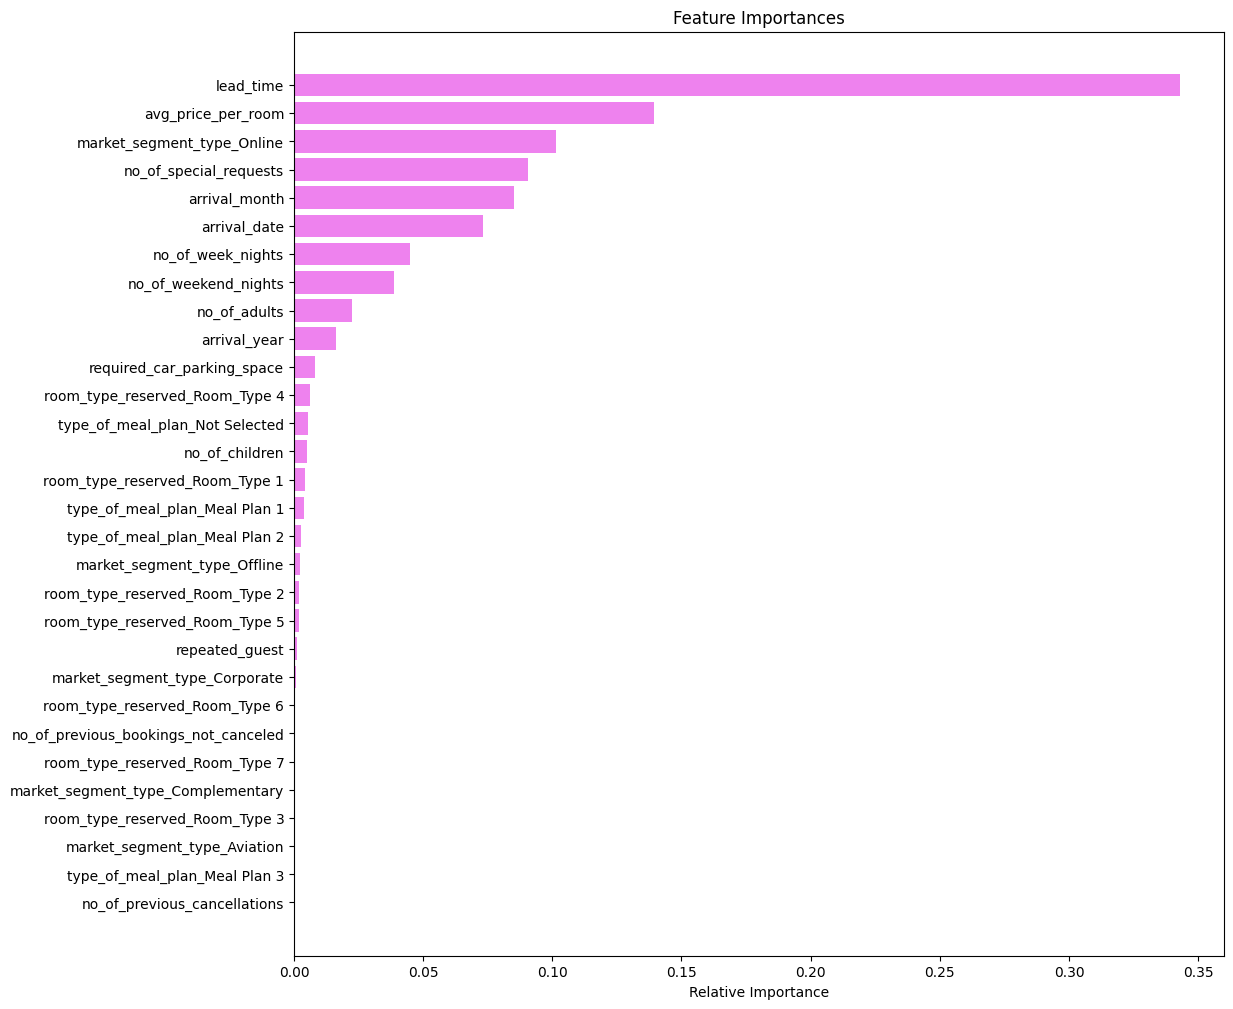

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Cost complexity pruning:

-The best model has finally rearrange and realign features on the basis of their relative importance to the target variable, booking_status.

-Lead time takes the first level of importance followed by 'average price per room', and the least important feature is 'repeated guests'.

-Other features from  'market segment type Corporate' down to 'number of previous cancellations' are at 'zero' level of importance in determining which booking will be cancelled.

**Comparing Decision Tree models**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99421                      0.99421   
Recall                   0.98661                      0.98661   
Precision                0.99578                      0.99578   
F1                       0.99117                      0.99117   

           Decision Tree (Post-Pruning)  
Accuracy                        0.84735  
Recall                          0.76719  
Precision                       0.76884  
F1                              0.76802

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df## Complete the code to compare performance of test set

Test performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.87182                      0.87182   
Recall                   0.80522                      0.80522   
Precision                0.80000                      0.80000   
F1                       0.80260                      0.80260   

           Decision Tree (Post-Pruning)  
Accuracy                        0.99568  
Recall                          0.99744  
Precision                       0.98930  
F1                              0.99336

-Decision tree model with Pre-pruning and post-pruning:

-The Decision Tree models with Pre-Pruning exhibit similar performance to the sklearn baseline model on both the training and testing sets.

-The Decision Tree model with Post-Pruning demonstrates a remarkable improvement in performance on the testing set, outperforming the other models with significantly higher accuracy and recall.

-Post-Pruning helps the Decision Tree model generalize better on unseen data, leading to higher accuracy and recall, especially in complex decision boundaries.

-
The Post-Pruned model shows significant improvement in performance on the testing set, indicating effective pruning strategies to enhance model generalizationsio..

**Actionable Insights and Recommendations
What profitable policies for cancellations and refunds can the hotel adopt?
What other recommedations would you suggest to the hotel?**

Observations:

1.The important features that can determine that a booking can be cancelled are: lead_time which is the most important feature,
follow by avg_price_per_room, market_segment_type_Online,no_of_special_requests,aarrival_month,rrival_date,no_of_week_nights,
no_weekend_nights, no_adults, arrival_year,required_car_parking_space,room_type_reserved_Room_Type 4,type_of_meal_plan_Not Selected,
no_children, room_type_reserved_Room_Type 1, room_type_reserved_Room_Type 4, ,no_of_children, type_of_Meal Plan 1,type_of_Meal Plan 2,
market_segment_type_Offline, room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 5, and repeated_guests.
These are the factors that determine cancellation of booking in descending order of importance.


2.From Decision Tree model with pre-pruning and post-pruning, post-pruning helps the Decision Tree model generalize better
on unseen data, leading to higher accuracy, Recall, and Precision in most especially in Testing data, especially in complex decision
boundaries. Therefore, we will choose post-pruned tree.


3.The Model is built to predict which of the bookings would be cancelled or not. The post-pruning of dataset can correctly
identify 99.7% of the Booking cancellations.


4.It has been established from the post-pruning decision tree that when the lead time follows a long path but gets truncated
when it is <=7.50. When it is >7.50, gets truncated, and no_week_nights >2.50, and avg_price_per_room <=62.50, a second
truncation occurs. The path continues until lead_time <=1, which leads to the cancellation of the booking.
When lead_time > 1, there was no cancellation, etc.

-when room_type_reserved_Room_Type 1>0.50, the booking would not be cancelled.


Recommendations:

1.Utilize the identified important features to monitor and manage booking cancellations effectively

2 Implement the post-pruned decision tree model for improved generalization on unseen data and higher predictive performanc

3 Focus on lead time, room type, and other key features identified in the decision tree for targeted interventions to reduce cancellatio

4 Continuously evaluate the model's performance on new data and adjust strategies based on insights from the decision tree analysis.

5.Profitable Cancellation and Refund Policies:
•	Dynamic Pricing: Implement dynamic pricing strategies that consider lead time, room type, and other influential factors to adjust cancellation fees and refund policies.
•	Flexible Cancellation: Offer flexible cancellation options such as free cancellations within a certain period or tiered cancellation fees based on lead time.
•	Refund Options: Provide partial refunds for cancellations within a reasonable timeframe or offer customers the option to reschedule their booking instead of cancelling.

6.Targeted Marketing and Customer Experience:
•	Personalized Offers: Use customer data to personalize offers and promotions for repeat guests, enticing them to book directly and reducing the likelihood of cancellations.
•	Enhanced Customer Service: Improve customer service interactions to address booking concerns promptly, offer alternatives before cancellations, and enhance overall guest experience.
7.Operational Efficiency and Data Management:
•	Real-Time Analytics: Implement real-time data analytics to monitor booking trends, identify potential cancellations in advance, and proactively manage room availability.
•	Integration of Systems: Ensure seamless integration of booking systems, customer databases, and communication channels to streamline operations and provide a cohesive booking experience.

8.Revenue Optimization and Upselling:
•	Upselling Opportunities: Identify upselling opportunities during the booking process or post-booking to enhance revenue per guest and incentivize customers to maintain their reservations.
•	Package Deals: Create attractive package deals that incentivize guests to book additional services or amenities, creating value-added propositions that reduce cancellations.
9.Risk Mitigation and Contingency Planning:
•	Overbooking Strategy: Develop an overbooking strategy backed by historical data analysis to maximize occupancy while minimizing revenue loss from cancellations.
•	Contingency Plans: Establish contingency plans for high-demand periods or unexpected cancellations, including partnerships with nearby hotels for accommodating guests if necessary.

10.Continuous Monitoring and Feedback Loop:
•	Feedback Mechanisms: Implement feedback mechanisms to gather insights from guests who cancel bookings, understand their reasons, and use the feedback to improve policies and services.
•	Regular Review: Continuously review and refine cancellation and refund policies based on performance metrics, guest feedback, and market dynamics to stay competitive and profitable.
